## INTRODUCTION

Coronavirus disease-19 (COVID-19) is a contagious disease caused by severe acute respiratory syndrome coronavirus 2 (SARS-CoV2). The first case was identified in Wuhan, China in December 2019. 
Common symptoms of COVID-19 include fever, cough, fatigue, breathing difficulties, and loss of smell and taste. Symptoms begin one to fourteen days after exposure to the virus. While most people have mild symptoms, some people develop acute respiratory distress syndrome (ARDS).<br>
COVID-19 spreads via a number of means, primarily involving saliva and other bodily fluids and excretions. These fluids can form small droplets and aerosols, which can spread as an infected person breathes, coughs, sneezes, sings, or speaks.
This Data Analysis project on Covid The project is a course project at Indian Institute of Technology, Dharwad which uses the various techniques of data analysis covered in the course. It consists of mainly 3 sections and is built completely over jupyter notebook using Python 3:<br>
<p>As a part of this course project for Data Analysis course our aim was to:
    <ul><li>
- Collect</li>
<li>- Analyze</li>
<li>- Represent</li>
<li>- Interpret</li></ul>
the data for COVID-19 from various data repositories.</p> 
In this project we hypothesise about the effects of COVID-19 and its repercussions. We then use the collected data to negate or support the hypothesis. We use python to plot immaculate graphs, help us analyse, interpret and draw conclusions from the data. Due to the massive amounts of data that we have collected using a code makes it much easier to work with.<br>

<h4>Importing python libraries to be used:</h4>

In [94]:
# Import necessary libraries
import numpy as np
import pandas as pd
from openpyxl import load_workbook
from datetime import date
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import seaborn as sns
import os # to work with local directory
import re
import plotly.express as px
import scipy.stats
from scipy.stats import pearsonr
from scipy.interpolate import interp1d
from itertools import islice
import seaborn as sb
import math
import statsmodels.formula.api as smf
import statsmodels.stats.multicomp as multi
import statsmodels.api as sm


In [2]:
import sys
!{sys.executable} -m pip install statsmodels

You should consider upgrading via the 'c:\users\ati\appdata\local\programs\python\python38\python.exe -m pip install --upgrade pip' command.


## Collection of Data
<p>Collection of data was the first step to execute this project. In order to collect data we used the internet as our primary source for accurate data collection and real time information. We combed through numerous websites to get the most precise, congruous and apt statistics. The URLs of these websites have been added below for our future reference and also for the reference of others. </p>
https://data.humdata.org/dataset/novel-coronavirus-2019-ncov-cases for total number of COVID cases worldwide .<br>
<u>Times of India; Ministry of Health and Family Welfare (India)</u> for age group wise data. <br>
https://www.researchgate.net/publication/340050986_The_Impact_of_Cross-Cultural_Differences_in_Handwashing_Patterns_on_the_COVID-19_Outbreak_Magnitude
https://data.humdata.org/dataset/novel-coronavirus-2019-ncov-cases for total number of COVID deaths worldwide .<br>
https://www.ecdc.europa.eu/en/publications-data/download-todays-data-geographic-distribution-covid-19-cases-worldwide for total case density worldwide. <br>
https://pib.gov.in/PressReleasePage.aspx?PRID=1638804 for trade statistics of India. <br>
https://en.wikipedia.org/wiki/List_of_countries_by_average_elevation for average altitude of each country. <br>
https://ourworldindata.org/grapher/deaths-covid-19-vs-case-fatality-rate?tab=table&time=2020-11-27 for Total cases,deaths and several other covid related factors per country. <br>
https://en.wikipedia.org/wiki/List_of_countries_and_dependencies_by_population_density for population density of each country.<br>
https://tradingeconomics.com/india/gdp-from-utilities for the indian economy statistics.<br>

We shall now import the data using the openpyxl and panda libraries in python:

<h4> Importing Data </h4>

<h6> Deriving data from local files </h6>
<p> Each file is stored in a dataframe (variable with names starting with df) of pandas and is then accessed from within the project </p

In [3]:
# To convert openpyxl files to data frames
def toDataFrame(ws):
    data = ws.values
    cols = next(data)[1:]
    data = list(data)
    idx = [r[0] for r in data]
    data = (islice(r, 1, None) for r in data)
    return pd.DataFrame(data, index=idx, columns=cols)

In [4]:
wb_JHU_confirmed = load_workbook(r"OrigData\\time-series-covid19-confirmed-global.xlsx")  
ws_JHU_confirmed = wb_JHU_confirmed[wb_JHU_confirmed.sheetnames[0]]
df_JHU_confirmed = toDataFrame(ws_JHU_confirmed)

wb_JHU_fatality = load_workbook(r"OrigData\\time_series_covid19_deaths_global.xlsx")  
ws_JHU_fatality = wb_JHU_fatality[wb_JHU_fatality.sheetnames[0]]
df_JHU_fatality = toDataFrame(ws_JHU_fatality)

wb_covid_data = load_workbook(r"OrigData\\owid-covid-data.xlsx")
ws_covid_data = wb_covid_data[wb_covid_data.sheetnames[0]]
df_covid_data = toDataFrame(ws_covid_data)

wb_age_data = load_workbook(r"OrigData\\statistic_id1110522_number-of-covid-19-cases-india-2020-by-age-group.xlsx")  # Work Book
ws_age_data = wb_age_data[wb_age_data.sheetnames[1]]
df_age_data = pd.DataFrame(ws_age_data.values)

wb_altitude = load_workbook(r"OrigData\\DA data altitude.xlsx")
ws_altitude = wb_altitude[wb_altitude.sheetnames[0]]
df_altitude = toDataFrame(ws_altitude)

wb_economy = load_workbook(r"OrigData\\GDP20192020.xlsx")  # Work Book
ws_economy = wb_economy[wb_economy.sheetnames[0]]
df_economy = toDataFrame(ws_economy)

wb_economy_IND = load_workbook(r"OrigData\\IND_eco.xlsx")
ws_economy_IND = wb_economy_IND[wb_economy_IND.sheetnames[0]]
df_economy_IND = toDataFrame(ws_economy_IND)


wb_handwash = load_workbook(r"OrigData\\handwashing_facilities.xlsx")
ws_handwash = wb_handwash[wb_handwash.sheetnames[0]]
df_handwash = toDataFrame(ws_handwash)



wb_IND_inf = load_workbook(r"OrigData\\Inflation2019And2020.xlsx")
ws_IND_inf = wb_IND_inf[wb_IND_inf.sheetnames[0]]
df_IND_inf = toDataFrame(ws_IND_inf)


<p> Now that we have stored the majority of the data in dataframes, we shall now display a <b>random sample</b> of data in each data frame to display the various columns and depict the data at hand </p>

<h4> Assessing the Imported Data Visually</h4>

In [5]:
df_JHU_fatality.sample(n=5)

Country/Region        Lat        Long  1/22/20  1/23/20  1/24/20  \
NaN          Argentina -38.416100  -63.616700        0        0        0   
NaN               Chad  15.454200   18.732200        0        0        0   
NaN              Libya  26.335100   17.228331        0        0        0   
NaN              Japan  36.204824  138.252924        0        0        0   
Ontario         Canada  51.253800  -85.323200        0        0        0   

         1/25/20  1/26/20  1/27/20  1/28/20  ...  11/21/20  11/22/20  \
NaN            0        0        0        0  ...     36902     37002   
NaN            0        0        0        0  ...       101       101   
NaN            0        0        0        0  ...      1068      1089   
NaN            0        0        0        0  ...      1932      1943   
Ontario        0        0        0        0  ...      3520      3532   

         11/23/20  11/24/20  11/25/20  11/26/20  11/27/20  11/28/20  11/29/20  \
NaN         37122     37432     37714     37941     38216     38322     38473   
NaN           101       101       101       101       101       101       101   
NaN          1102      1110      1125      1140      1153      1153      1166   
NaN          1949      1963      1983      1996      2028      2042      2057   
Ontario      3553      3576      3576      3593      3616      3640      3661   

         11/30/20  
NaN         38730  
NaN           101  
NaN          1183  
NaN          2076  
Ontario      3672  

[5 rows x 317 columns]

In [6]:
df_JHU_confirmed.head(n=5)

Country/Region       Lat       Long  1/22/20  1/23/20  1/24/20  1/25/20  \
NaN    Afghanistan  33.93911  67.709953        0        0        0        0   
NaN        Albania  41.15330  20.168300        0        0        0        0   
NaN        Algeria  28.03390   1.659600        0        0        0        0   
NaN        Andorra  42.50630   1.521800        0        0        0        0   
NaN         Angola -11.20270  17.873900        0        0        0        0   

     1/26/20  1/27/20  1/28/20  ...  11/21/20  11/22/20  11/23/20  11/24/20  \
NaN        0        0        0  ...     44503     44706     44988     45280   
NaN        0        0        0  ...     32196     32761     33556     34300   
NaN        0        0        0  ...     73774     74862     75867     77000   
NaN        0        0        0  ...      6207      6256      6304      6351   
NaN        0        0        0  ...     14413     14493     14634     14742   

     11/25/20  11/26/20  11/27/20  11/28/20  11/29/20  11/30/20  
NaN     45490     45716     45839     45966     46215     46498  
NaN     34944     35600     36245     36790     37625     38182  
NaN     78025     79110     80168     81212     82221     83199  
NaN      6428      6534      6610      6610      6712      6745  
NaN     14821     14920     15008     15087     15103     15139  

[5 rows x 317 columns]

In [7]:
df_country_cases = df_JHU_confirmed[['Country/Region','Lat','Long','11/30/20']]
df_country_cases.sample(5)

Country/Region      Lat      Long  11/30/20
NaN                         Cabo Verde  16.5388  -23.0418     10761
Heilongjiang                     China  47.8620  127.7615       949
NaN           Central African Republic   6.6111   20.9394      4913
NaN                            Algeria  28.0339    1.6596     83199
NaN                              Nepal  28.1667   84.2500    233452

In [8]:
df_covid_data.head(n=5)

continent     location        date  total_cases  new_cases  \
AFG      Asia  Afghanistan  2020-01-23          NaN        0.0   
AFG      Asia  Afghanistan  2020-01-24          NaN        0.0   
AFG      Asia  Afghanistan  2020-01-25          NaN        0.0   
AFG      Asia  Afghanistan  2020-01-26          NaN        0.0   
AFG      Asia  Afghanistan  2020-01-27          NaN        0.0   

     new_cases_smoothed  total_deaths  new_deaths  new_deaths_smoothed  \
AFG                 NaN           NaN         0.0                  NaN   
AFG                 NaN           NaN         0.0                  NaN   
AFG                 NaN           NaN         0.0                  NaN   
AFG                 NaN           NaN         0.0                  NaN   
AFG                 NaN           NaN         0.0                  NaN   

     total_cases_per_million  ...  gdp_per_capita  extreme_poverty  \
AFG                      NaN  ...        1803.987              NaN   
AFG                      NaN  ...        1803.987              NaN   
AFG                      NaN  ...        1803.987              NaN   
AFG                      NaN  ...        1803.987              NaN   
AFG                      NaN  ...        1803.987              NaN   

     cardiovasc_death_rate  diabetes_prevalence  female_smokers  male_smokers  \
AFG                597.029                 9.59             NaN           NaN   
AFG                597.029                 9.59             NaN           NaN   
AFG                597.029                 9.59             NaN           NaN   
AFG                597.029                 9.59             NaN           NaN   
AFG                597.029                 9.59             NaN           NaN   

     handwashing_facilities  hospital_beds_per_thousand  life_expectancy  \
AFG                  37.746                         0.5            64.83   
AFG                  37.746                         0.5            64.83   
AFG                  37.746                         0.5            64.83   
AFG                  37.746                         0.5            64.83   
AFG                  37.746                         0.5            64.83   

     human_development_index  
AFG                    0.498  
AFG                    0.498  
AFG                    0.498  
AFG                    0.498  
AFG                    0.498  

[5 rows x 49 columns]

In [9]:
df_age_data.iloc[[5,6, 7, 8,9,10], [1, 2]]

1     2
5   Less than 14 years   0.5
6          15-29 years   2.5
7          30-44 years  11.4
8          45-59 years  35.1
9          60-74 years  40.2
10  More than 75 years  10.3

In [10]:
df_altitude.head(5)

Fatality ratio  No of cases            Altitude          NaN  \
Afghanistan          0.0383       1737.0  1,885 m (6,184 ft)  Afghanistan   
Algeria              0.0297       2352.0    800 m (2,625 ft)      Algeria   
Angola               0.0229        340.0  1,112 m (3,648 ft)       Angola   
Argentina            0.0271      37941.0    595 m (1,952 ft)    Argentina   
Australia            0.0325        907.0    330 m (1,083 ft)    Australia   

             population density   NaN  
Afghanistan                49.0  None  
Algeria                    18.0  None  
Angola                     23.0  None  
Argentina                  16.0  None  
Australia                   3.0  None

In [11]:
df_economy_IND.head(5)

INFLATION RATE INDIA INFRASTRUCTURE OUTPUT LENDING RATES  \
2019-11-01           5.54                         0.7           9.4   
2019-12-01           7.35                         3.1           9.4   
2020-01-01           7.59                         2.2           9.4   
2020-02-01           6.58                         6.4           9.4   
2020-03-01           5.84                        -8.6           9.4   

           REPO RATES GOVERNMENT REVENUES  CONSUMER SPENDING   NaN  QUARTER  \
2019-11-01        4.9              10122.2             19119  None  2018 Q1   
2019-12-01        4.9              11779.2           19841.8  None   2018Q2   
2020-01-01        4.9              12828.6           18890.1  None  2018 Q3   
2020-02-01        4.9              14288.7           19038.5  None  2018 Q4   
2020-03-01          4              17507.3           20464.2  None  2019 Q1   

           Business Expectations Index (BEI)  
2019-11-01                               115  
2019-12-01                             115.8  
2020-01-01                             114.6  
2020-02-01                             114.1  
2020-03-01                               115

In [12]:
df_IND_inf_modif = df_IND_inf[:-4]
df_IND_inf_modif = df_IND_inf_modif.loc[:,'2015':'2023']
df_IND_inf_modif

2015  2016  2017  2018  2019  2020  2021  2022  \
Australia                     1.5   1.3   2.0   1.9   1.6   0.7   1.3   1.5   
Canada                        1.1   1.4   1.6   2.3   1.9   0.6   1.3   1.6   
China, People's Republic of   1.4   2.0   1.6   2.1   2.9   2.9   2.7   2.6   
Ethiopia                      9.6   6.6  10.7  13.8  15.8  20.2  11.5   8.0   
France                        0.1   0.3   1.2   2.1   1.3   0.5   0.6   1.0   
Germany                       0.7   0.4   1.7   2.0   1.3   0.5   1.1   1.3   
India                         4.9   4.5   3.6   3.4   4.8   4.9   3.7   3.8   
Iraq                          1.4   0.5   0.1   0.4  -0.2   0.8   1.0   1.5   
Japan                         0.8  -0.1   0.5   1.0   0.5  -0.1   0.3   0.7   
Kenya                         6.6   6.3   8.0   4.7   5.2   5.3   5.0   5.0   
United States                 0.1   1.3   2.1   2.4   1.8   1.5   2.8   2.1   

                            2023  
Australia                    1.9  
Canada                       1.9  
China, People's Republic of  2.6  
Ethiopia                       8  
France                       1.2  
Germany                      1.5  
India                        3.9  
Iraq                         1.8  
Japan                        0.8  
Kenya                          5  
United States                2.1

<h3> Organising the Imported Data via Program </h3>

<p>Here we have printed the names of the countries available in the data set of the two sources namely:
<ol>
    <li>John Hopkins Dataset(JHD)</li>
    <li>Our World In Data(OWID)</li>
    </p>

<p> The list of countries available in John Hopkins University data set are:

In [13]:
# List of countries available in JHU and OWID data sets
print("countries available in John Hopkins Dataset :")
df_JHU_confirmed['Country/Region'].unique()


countries available in John Hopkins Dataset :


array(['Afghanistan', 'Albania', 'Algeria', 'Andorra', 'Angola',
       'Antigua and Barbuda', 'Argentina', 'Armenia', 'Australia',
       'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain', 'Bangladesh',
       'Barbados', 'Belarus', 'Belgium', 'Belize', 'Benin', 'Bhutan',
       'Bolivia', 'Bosnia and Herzegovina', 'Botswana', 'Brazil',
       'Brunei', 'Bulgaria', 'Burkina Faso', 'Burma', 'Burundi',
       'Cabo Verde', 'Cambodia', 'Cameroon', 'Canada',
       'Central African Republic', 'Chad', 'Chile', 'China', 'Colombia',
       'Comoros', 'Congo (Brazzaville)', 'Congo (Kinshasa)', 'Costa Rica',
       "Cote d'Ivoire", 'Croatia', 'Cuba', 'Cyprus', 'Czechia', 'Denmark',
       'Diamond Princess', 'Djibouti', 'Dominica', 'Dominican Republic',
       'Ecuador', 'Egypt', 'El Salvador', 'Equatorial Guinea', 'Eritrea',
       'Estonia', 'Eswatini', 'Ethiopia', 'Fiji', 'Finland', 'France',
       'Gabon', 'Gambia', 'Georgia', 'Germany', 'Ghana', 'Greece',
       'Grenada', 'Guatemala', 'Guin

<p> The countries available in OWID data set are : </p>

In [14]:
print("countries available in OWID :")
df_covid_data['location'].unique()


countries available in OWID :


array(['Afghanistan', 'Angola', 'Albania', 'Andorra',
       'United Arab Emirates', 'Argentina', 'Armenia',
       'Antigua and Barbuda', 'Australia', 'Austria', 'Azerbaijan',
       'Burundi', 'Belgium', 'Benin', 'Burkina Faso', 'Bangladesh',
       'Bulgaria', 'Bahrain', 'Bahamas', 'Bosnia and Herzegovina',
       'Belarus', 'Belize', 'Bolivia', 'Brazil', 'Barbados', 'Brunei',
       'Bhutan', 'Botswana', 'Central African Republic', 'Canada',
       'Switzerland', 'Chile', 'China', "Cote d'Ivoire", 'Cameroon',
       'Democratic Republic of Congo', 'Congo', 'Colombia', 'Comoros',
       'Cape Verde', 'Costa Rica', 'Cuba', 'Cyprus', 'Czech Republic',
       'Germany', 'Djibouti', 'Dominica', 'Denmark', 'Dominican Republic',
       'Algeria', 'Ecuador', 'Egypt', 'Eritrea', 'Western Sahara',
       'Spain', 'Estonia', 'Ethiopia', 'Finland', 'Fiji', 'France',
       'Gabon', 'United Kingdom', 'Georgia', 'Ghana', 'Guinea', 'Gambia',
       'Guinea-Bissau', 'Equatorial Guinea', 'Greece', 

<p>We shall now organise the data into dataframes and/or data structures like that of dictionaries in python</p>

In [15]:
letters = "a b c d e f g h i j k l m n o p q r s t u v w x y z".upper().split()
alphas = []
for i in letters:
    alphas.append(i)
for i in letters:
    for j in letters:
        k = (i+j)  
        alphas.append(k)
        if k == 'LF':
            break
    if i == 'L':
        break
alphas = alphas[4:]        


Collecting total cases in world using JHU data:

In [16]:

totalCasesInWorldJHU = []
dateTotalCasesInWorldJHU = []
for X in alphas:
    column = ws_JHU_confirmed[X]
    Sum = 0
    for i in range(1,272):
        Sum+=column[i].value
    if isinstance(column[0].value, str): 
        dateTotalCasesInWorldJHU.append(column[0].value)
    else: 
        dateTotalCasesInWorldJHU.append(column[0].value.strftime('%d/%m/%Y'))
    totalCasesInWorldJHU.append(Sum)

Collecting total deaths in world using JHU data:

In [17]:
totalDeathsInWorldJHU = []
dateTotalDeathsInWorldJHU = []
for X in alphas:
    column = ws_JHU_fatality[X]
    Sum = 0
    for i in range(1,272):
        Sum+=column[i].value
    if isinstance(column[0].value, str): 
        dateTotalDeathsInWorldJHU.append(column[0].value)
    else: 
        dateTotalDeathsInWorldJHU.append(column[0].value.strftime('%d/%m/%Y'))
    totalDeathsInWorldJHU.append(Sum)


Storing all data from OWID into a dictionary

In [18]:
dataCol = "a b c d e f g h i j k l m n o p q r s t u v w x y z aa ab ac ad ae af ag ah ai aj ak al am an ao ap aq ar as at au av aw ax".upper().split(" ")
dataOWID = {}
for X in dataCol:
    column = ws_covid_data[X]
    sample = []
    for x in range(1,len(column)):
          sample.append(column[x].value)
    dataOWID[column[0].value] = sample  
def dailyKeyReturnerUsingLoc(code,key):
    loc = dataOWID['location']
    date = dataOWID['date']
    total_cases = dataOWID[key]
    total_cases_IND = []
    date_IND = []    
    for x in range(len(loc)):
        if loc[x] == code:
            total_cases_IND.append(total_cases[x])
            date_IND.append(date[x])
    return [date_IND,total_cases_IND]
# print(dataOWID['date'])    

In [19]:
dataCol = "b c d e f g".upper().split(" ")
dataEconInd = {}
for X in dataCol:
    column = ws_economy_IND[X]
    sample = []
    for x in range(3,13):
          sample.append(column[x].value)
    dataEconInd[column[0].value] = sample  
# dataEconInd
def economyGetter(key):
    return dataEconInd[key]

In [20]:
dataCol = "a b c e f g h i j k l m n o p q r s t u v w x y z aa ab ac ad ae af ag ah ai aj ak al am an ao ap aq ar as at au av aw ax".upper().split(" ")
dataOWID_today = {}
for X in dataCol:
    column = ws_covid_data[X]
    sample = []
    dates = ws_covid_data['D']
    for x in range(1,len(column)):
          if dates[x].value == '2020-11-29':  
              sample.append(column[x].value)
    dataOWID_today[column[0].value] = sample  
# dataOWID_today['location']



Creating a dataframe that stores the current data of the countries present in OWID data set

In [21]:
df_cases_today = pd.DataFrame.from_dict(dataOWID_today)
df_cases_today.sample(n=5)

iso_code      continent         location  total_cases  new_cases  \
68       GRC         Europe           Greece       104227       1193   
149      SLB        Oceania  Solomon Islands           17          0   
94       LAO           Asia             Laos           39          0   
5        ARG  South America        Argentina      1418807       5432   
73       HRV         Europe          Croatia       126612       2919   

     new_cases_smoothed  total_deaths  new_deaths  new_deaths_smoothed  \
68             1801.143        2321.0          98               98.714   
149               0.143           NaN           0                0.000   
94                2.000           NaN           0                0.000   
5              6920.143       38473.0         151              210.143   
73             3270.571        1712.0          57               51.286   

     total_cases_per_million  ...  gdp_per_capita  extreme_poverty  \
68                  9999.658  ...       24574.382              1.5   
149                   24.750  ...        2205.923             25.1   
94                     5.360  ...        6397.360             22.7   
5                  31392.468  ...       18933.907              0.6   
73                 30841.348  ...       22669.797              0.7   

     cardiovasc_death_rate  diabetes_prevalence  female_smokers male_smokers  \
68                 175.695                 4.55            35.3         52.0   
149                459.780                18.68             NaN          NaN   
94                 368.111                 4.00             7.3         51.2   
5                  191.032                 5.50            16.2         27.7   
73                 253.782                 5.59            34.3         39.9   

    handwashing_facilities hospital_beds_per_thousand life_expectancy  \
68                     NaN                       4.21           82.24   
149                 35.890                       1.40           73.00   
94                  49.839                       1.50           67.92   
5                      NaN                       5.00           76.67   
73                     NaN                       5.54           78.49   

    human_development_index  
68                    0.870  
149                   0.546  
94                    0.601  
5                     0.825  
73                    0.831  

[5 rows x 49 columns]

Creating a dataframe that stores the current data from OWID data set from selected countries

In [22]:
df_cases_selected_countries = df_cases_today.query('location in ["India","Italy","United States","Japan"]')
df_cases_selected_countries

iso_code      continent       location  total_cases  new_cases  \
77       IND           Asia          India      9431691      38772   
83       ITA         Europe          Italy      1585178      20646   
86       JPN           Asia          Japan       147515       2058   
177      USA  North America  United States     13383320     138903   

     new_cases_smoothed  total_deaths  new_deaths  new_deaths_smoothed  \
77            41689.429      137139.0         443              485.857   
83            25187.143       54904.0         541              725.857   
86             2068.714        2057.0          15               16.286   
177          162364.857      266873.0         826             1429.571   

     total_cases_per_million  ...  gdp_per_capita  extreme_poverty  \
77                  6834.537  ...        6426.674             21.2   
83                 26217.831  ...       35220.084              2.0   
86                  1166.344  ...       39002.223              NaN   
177                40432.668  ...       54225.446              1.2   

     cardiovasc_death_rate  diabetes_prevalence  female_smokers male_smokers  \
77                 282.280                10.39             1.9         20.6   
83                 113.151                 4.78            19.8         27.8   
86                  79.370                 5.72            11.2         33.7   
177                151.089                10.79            19.1         24.6   

    handwashing_facilities hospital_beds_per_thousand life_expectancy  \
77                   59.55                       0.53           69.66   
83                     NaN                       3.18           83.51   
86                     NaN                      13.05           84.63   
177                    NaN                       2.77           78.86   

    human_development_index  
77                    0.640  
83                    0.880  
86                    0.909  
177                   0.924  

[4 rows x 49 columns]

Creating a dataframe where all the attributes related to diseases are not null/None from the current status dataframe derived originally from the OWID dataframe.

In [23]:
disease_list =  ['cardiovasc_death_rate','female_smokers','male_smokers','diabetes_prevalence','total_deaths_per_million']
df_disease = df_cases_today.dropna(subset=disease_list)
colsList = ['location','total_deaths_per_million','cardiovasc_death_rate','female_smokers','male_smokers','diabetes_prevalence']
df_disease[colsList].sample(n=5)

location  total_deaths_per_million  cardiovasc_death_rate  \
19   Bosnia and Herzegovina                   798.582                329.635   
143                  Russia                   268.114                431.297   
38                  Comoros                     8.050                261.516   
159                Slovenia                   665.726                153.493   
141                   Qatar                    82.261                176.690   

     female_smokers  male_smokers  diabetes_prevalence  
19             30.2          47.7                10.08  
143            23.4          58.3                 6.18  
38              4.4          23.6                11.88  
159            20.1          25.0                 7.25  
141             0.8          26.9                16.52

Creating a dataframe in a similar way as above but for age groups data this time

In [24]:
ageGroupList = ['total_cases_per_million','aged_70_older','aged_65_older','median_age']
df_ageGroupData = df_cases_today.dropna(subset=ageGroupList)
colsList = ['location','total_cases_per_million','aged_70_older','aged_65_older','median_age']
df_ageGroupData[colsList].sample(n=5)

location  total_cases_per_million  aged_70_older  \
100                         Sri Lanka                 1096.704          5.331   
35       Democratic Republic of Congo                  141.824          1.745   
41                               Cuba                  726.872          9.719   
58                               Fiji                   42.390          3.284   
180  Saint Vincent and the Grenadines                  766.132          4.832   

     aged_65_older  median_age  
100         10.069        34.1  
35           3.020        17.0  
41          14.738        43.1  
58           6.224        28.6  
180          7.724        31.8

Duplicating the altitude data dataframe to have integral values for altitude (in m) for easier analysis

In [25]:
altitudeList = ['Altitude','Fatality ratio','No of cases']
alt = df_altitude['Altitude']
df_altitude_modif = df_altitude.copy()
for i in range(len(alt)):
    if alt[i]!=None:
        temp = alt[i]
        temp = temp.split('m')
        temp = temp[0]
        temp = float(temp.replace(',','').replace(' ',''))
        df_altitude_modif.iloc[i, df_altitude_modif.columns.get_loc('Altitude')] = temp
df_altitude_modif.sample(n=5)

Fatality ratio  No of cases Altitude          NaN  \
Chile            0.0279      15235.0     1870        Chile   
Cuba             0.0165        133.0      108         Cuba   
Ghana            0.0063        323.0      190        Ghana   
Japan            0.0147       2051.0      438        Japan   
Jamaica          0.0235        248.0      340  Ivory Coast   

         population density   NaN  
Chile                  23.0  None  
Cuba                  102.0  None  
Ghana                 127.0  None  
Japan                 333.0  None  
Jamaica                80.0  None

Creating a dataframe where all the attributes related to economy are not null/None from the current status dataframe derived originally from the OWID dataframe.

In [26]:
economy_list =  ['gdp_per_capita','human_development_index','extreme_poverty','total_deaths_per_million','total_cases_per_million']
df_economy = df_cases_today.dropna(subset=disease_list)
colsList = ['location','total_deaths_per_million','gdp_per_capita','extreme_poverty','human_development_index','total_cases_per_million']
df_disease[colsList].sample(n=5)

location  total_deaths_per_million  gdp_per_capita  \
4    United Arab Emirates                    57.632       67293.483   
62                Georgia                   308.334        9745.079   
5               Argentina                   851.252       18933.907   
104                Latvia                   104.443       25063.846   
43         Czech Republic                   759.923       32605.906   

     extreme_poverty  human_development_index  total_cases_per_million  
4                NaN                    0.863                16961.195  
62               4.2                    0.780                33181.798  
5                0.6                    0.825                31392.468  
104              0.7                    0.847                 8999.566  
43               NaN                    0.888                48531.504

Creating a dataframe where all the attributes related to medical facilities across various countries are not null/None from the current status dataframe derived originally from the OWID dataframe.

In [27]:
medical_list =  ['life_expectancy','handwashing_facilities','hospital_beds_per_thousand','total_deaths_per_million','total_cases_per_million']
df_medical = df_cases_today.dropna(subset=disease_list)
colsList = ['location','total_deaths_per_million','life_expectancy','handwashing_facilities','hospital_beds_per_thousand','total_cases_per_million']
df_medical[colsList].sample(n=5)

location  total_deaths_per_million  life_expectancy  \
8     Australia                    35.608            83.44   
154      Serbia                   227.640            76.00   
39   Cape Verde                   188.853            72.98   
110      Mexico                   819.458            75.05   
148   Singapore                     4.957            83.62   

     handwashing_facilities  hospital_beds_per_thousand  \
8                       NaN                       3.840   
154                  97.719                       5.609   
39                      NaN                       2.100   
110                  87.847                       1.380   
148                     NaN                       2.400   

     total_cases_per_million  
8                   1094.201  
154                24867.604  
39                 19329.554  
110                 8586.422  
148                 9950.357

In [28]:
df_handwash = df_handwash.dropna()
df_handwash

per
Saudi Arabia       0.03
Bosnia             0.04
Algeria            0.06
Lebanon            0.06
Papua New Guinea   0.06
...                 ...
Thailand           0.48
Netherlands        0.50
South Korea        0.61
Japan              0.70
China              0.77

[63 rows x 1 columns]

<h4> Assessing Data Consistency for JHU and OWID </h4>

<p> Here we check for the consistancy of data retrived from two separate sources namely John Hopkins University and OWID. We perform the test for Total cases across the globe from both the data sets. We apply regression to see how closely the data at hand are related to eachother.</p>

Taking total cases world wide using OWID data:

Regression line: y=0.00+1.00x, r=1.00


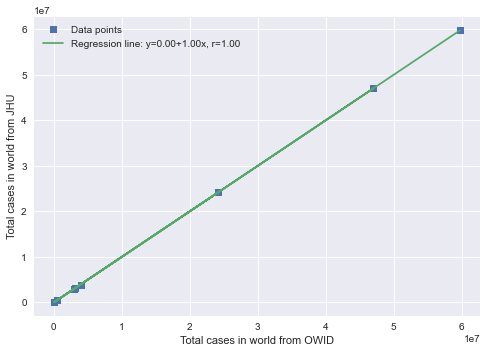

In [29]:
data = dailyKeyReturnerUsingLoc('World','total_cases')
x = []
for i in range(10):
    x.append(np.random.randint(313)-1)    
data_JHU = []
data_OWID = []
for i in x:
    data_OWID.append(data[1][i])
    data_JHU.append(totalCasesInWorldJHU[i])
    
plt.style.use('seaborn')
slope, intercept, r, p, stderr = scipy.stats.linregress(data_OWID, data_JHU )
line = f'Regression line: y={intercept:.2f}+{slope:.2f}x, r={r:.2f}'
print(line)
fig, ax = plt.subplots()
ax.plot(data_OWID, data_JHU, linewidth=0, marker='s', label='Data points')
temp = []
for x in data_OWID:
    temp.append(slope*x)
ax.plot(data_OWID, intercept + temp, label=line)
ax.set_xlabel('Total cases in world from OWID')
ax.set_ylabel('Total cases in world from JHU')
ax.legend(facecolor='white')
plt.show()

Since the regression line has a slope of 1, we can well conclude that the given data sets are well consistant with eachother.

<h4>Quality Observations of the data:</h4> <ul>
<li>Validity: Some observations/rows in dataframes 'df_JHU_confirmed', 'df_JHU_fatality' contain the values for a region, for example Australia appears multiple times in column country as the observations are per region.</li>
<li>Consistency: Some countries are referred to with varying names, for example 'US' and 'United Stats'. Other names are not valid.</li>

<h1>Representation and Interpretation of Data:</h1>

We have plotted these graphs to show the ramifications of COVID-19 around the world and in India which is the most effected nation second to only the USA around the world. We have tried to highlight the nuances of the number COVID cases for each day since it got off the ground and have in the process exhibited a general trend between worldwide numbers and in India. The general plots are:<br>
<h6> Scenario at Indian and Global levels: </h6>
1. Total cases and deaths worldwide due to COVID-19<br>
2. Heat map of the total cases in the world<br>
3. Total cases,deaths in India <br>
<br>

<h6>Hypothesis using the data sets at hand:</h6> <br>
Here we try to eshtablish some of the insconpicuous trends which do not feature in the mainstream news. We first hypothesise something which we feel could influence the impact of COVID-19 for that region/age group/race/people with a specific illness etc. With the help of our code and the gathered data we make plots and eshtablish a trend if the trend is present. If not, then we negate the hypothesis. We take into consideration some degree of error and have a confidence level above which we can safely say that the real time data supports our hypothesis. Our hypothesis are:  <br>
1. Comaprision of scenarios between India and few other countries <br>
3. Effect of Age groups on number of covid cases <br>
5. Effect of other diseases upon the cases and fatalities of Covid across several countries <br>
6. Effect of altitude upon the fatalities of Covid across several countries <br>
7. Effect of a country's economy upon the cases and fatalities due to covid <br>
8. Effect of Hospital facilities upon the cases observed in covid  <br>
9. Effect of Covid cases on the Indian Economy<br>
10. India vs USA GDP comaprision <br>
<br>
<h6>Interpretation using bivariate data:</h6><br>
Here we in the last leg of our project by drawing out the final plots of those hypothesis which are supported by the data we have obtained. We deduce the proportoinality and the relation and conclude the project. The hypothesis whic have definite trends are:<br>
1. Female smokers, age 70 older, deaths := scatter and heat map <br>

Utility functions for plotting used :

In [30]:
def dayWisePlotter(x,y,figsize,xlabel,ylabel,title,MaxNLocator,xticklabels,rotation):
    plt.figure(figsize=figsize)
    ax = plt.axes(xlabel=xlabel,ylabel=ylabel,title=title)
    ax.xaxis.set_major_locator(plt.MaxNLocator(MaxNLocator))
    fig = ax.figure
    ax.figure.canvas.draw()
    ax.yaxis.set_major_formatter('{x:0.0f}')
    ax.set_xticklabels(xticklabels)                
    fig.autofmt_xdate(rotation=rotation)
    ax.plot(x,y)
    plt.show()

def monthWisePlotter(x,y,figsize,xlabel,ylabel,title):
    plt.figure(figsize=figsize)
    ax = plt.axes(xlabel=xlabel,ylabel=ylabel,title=title)
    ax.plot(x,y)
    plt.show()


    

utility functions for interpretation:

In [31]:
def correlationChecker(data_OWID,data_JHU,owid,jhu):
    slope, intercept, r, p, stderr = scipy.stats.linregress(data_OWID, data_JHU )
    line = f'Regression line: y={intercept:.2f}+{slope:.2f}x, r={r:.2f}'
    print(line)
    fig, ax = plt.subplots()
    ax.plot(data_OWID, data_JHU, linewidth=0, marker='s', label='Data points')
    temp = []
    for x in data_OWID:
        temp.append(slope*x)
    ax.plot(data_OWID, intercept + temp, label=line)
    ax.set_xlabel(owid)
    ax.set_ylabel(jhu)
    ax.legend(facecolor='white')
    plt.show()



In [32]:
def bin(dataframe, cols):
# Create new columns that store the binned data
    for col in cols:
        new_col_name = "{}_bins".format(col)
        dataframe[new_col_name] = pd.qcut(dataframe[col], 10, labels=["1=10%", "2=20%", "3=30%", "4=40%", "5=50%", "6=60%", "7=70%", "8=80", "9=90%", "10=100%"])


# Current Scenario at Global and Indian level

<h2> Total cases and deaths worldwide due to COVID-19</h2>


<h4> Total cases world wide </h4>

<ipython-input-30-8077a346ca64>:8: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(xticklabels)


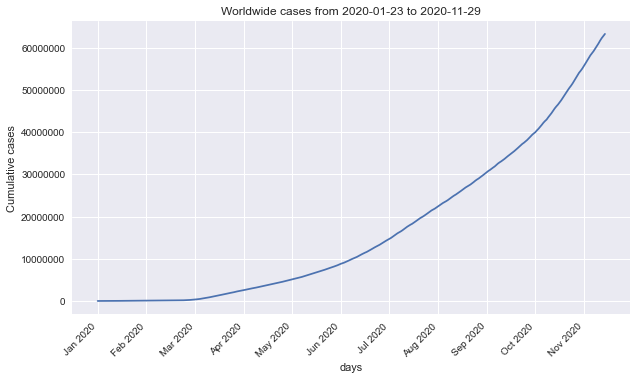

In [33]:
xticklabels=["","Jan 2020","Feb 2020","Mar 2020","Apr 2020","May 2020","Jun 2020","Jul 2020","Aug 2020","Sep 2020","Oct 2020","Nov 2020"]   
dayWisePlotter(dateTotalCasesInWorldJHU,totalCasesInWorldJHU,[10,6],"days","Cumulative cases","Worldwide cases from 2020-01-23 to 2020-11-29",12,xticklabels,45)


<p>The first plot shows the number of cases worldwide on the y-axis verses the date on the x-axis with
date starting from 23rd Jan,2020 to 29th Nov,2020. We can see that the number of cases is rising very drastically after end of March and is continuing its uptrend. The graph is not exponential but resemble to be exponential. In the python code we have taken an array named xticklables which contains the month and year, then we have used a function dayWisePlotter to plot the line graph for the same.</p>

<h4> Total Deaths World Wide </h4>

<ipython-input-30-8077a346ca64>:8: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(xticklabels)


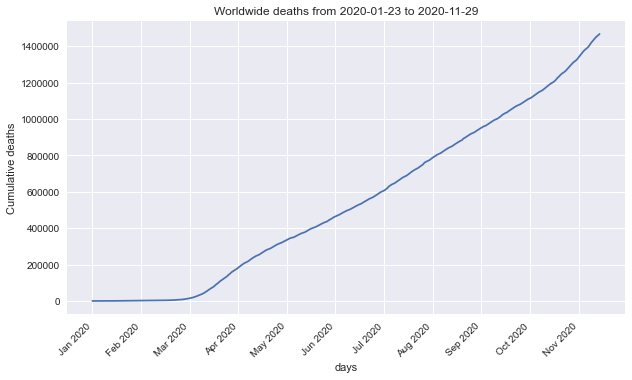

In [34]:
dayWisePlotter(dateTotalDeathsInWorldJHU,totalDeathsInWorldJHU,[10,6],"days","Cumulative deaths","Worldwide deaths from 2020-01-23 to 2020-11-29",12,xticklabels,45)

<p>The second plot shows the number of deaths worlwide on the y-axis verses the date on the x-axis.
Date starting from 23rd Jan,2020 to 29th Nov,2020.
We can again observe that the number of deaths is rising very drastically after the end of March and is continuing its uptrend.
The graph is not linear but resembles to be linear.
In the python code we just called the function dayWisePlotter and changed the arguments to the totalDeathsInWorldJHU.</p>


Let us look for the correlation between the cases and deaths.

Regression line: y=136089.40+0.02x, r=0.97


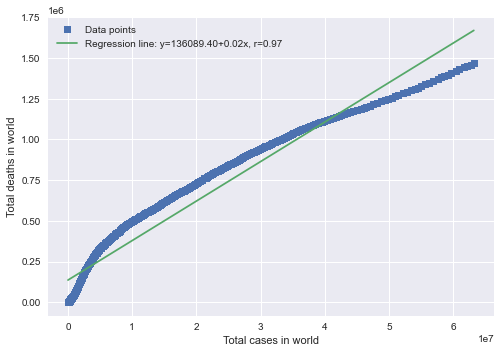

In [35]:
correlationChecker(totalCasesInWorldJHU,totalDeathsInWorldJHU,"Total cases in world","Total deaths in world")

Now we have compared the number of cases and the number of deaths in India with the world.
For this we are linear regression.
In statistics, linear regression is a linear approach to modelling the relationship between a scalar response and one or more explanatory variables (also known as dependent and independent variables). The case of one explanatory variable is called simple linear regression; for more than one, the process is called multiple linear regression.
In the first plot we have Total cases of covid in the world on y-axis verses the Total cases of covid in India on x-axis.
In the second plot we have Total deaths due to covid in the world on y-axis verses the Total deaths due to covid in India on x-axis.


<P>
    From the above <b>correlation coefficient = 0.97</b><br>
This means that there is a strong correlation and between total cases and total deaths. <br>
 From above graph we can say that country which reported higher number of cases will also report high number of deaths due to covid
    </P>

<h2> Heat map of the total cases in the world </h2>


In [36]:
circle_radius = 10
typeLists = ['stamen-watercolor']
for i in typeLists:
    fig = px.density_mapbox(df_country_cases, lat='Lat', lon='Long', radius=circle_radius, zoom=0, mapbox_style=i)
    fig.show()

<p>A heat map (or heatmap) is a data visualization technique that shows magnitude of a phenomenon as color in two dimensions. The variation in color may be by hue or intensity, giving obvious visual cues to the reader about how the phenomenon is clustered or varies over space.
Here we have plotted a heat map for the total number of cases in the world.
The program is written for the same.</p>


<h2> Total cases and Deaths in India </h2>

<ipython-input-30-8077a346ca64>:8: UserWarning:

FixedFormatter should only be used together with FixedLocator



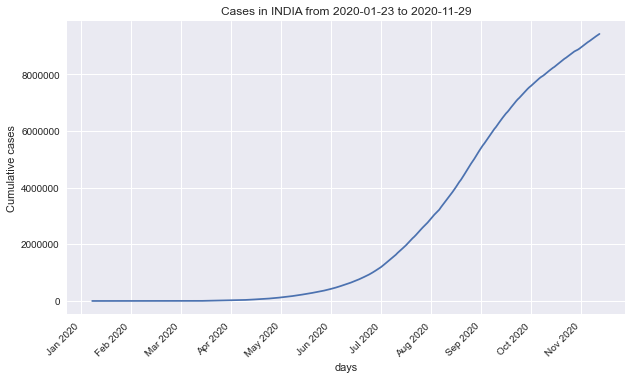

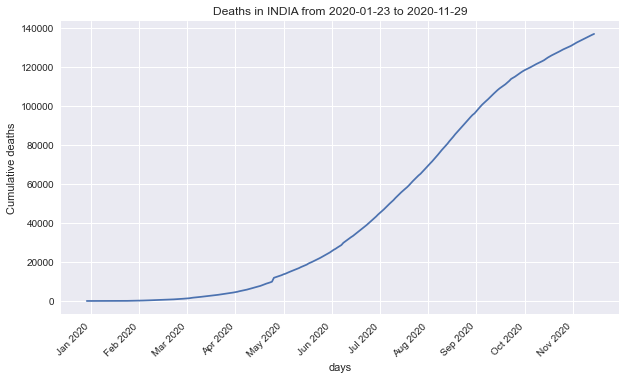

In [37]:
dataCasesIND = dailyKeyReturnerUsingLoc('India','total_cases')
dataCasesIND_month = []
for i in range(len(dataCasesIND[0])):
    test = dataCasesIND[0][i]
    test = test[len(test)-2:]
#     print(test)
    p = re.compile('01$')
    if p.match(test):
        dataCasesIND_month.append(dataCasesIND[1][i])
# print(dataCasesIND_month)
dataDeathsIND = dailyKeyReturnerUsingLoc('India','total_deaths')
dayWisePlotter(dataCasesIND[0],dataCasesIND[1],[10,6],"days","Cumulative cases","Cases in INDIA from 2020-01-23 to 2020-11-29",12,xticklabels,45)
dayWisePlotter(dataDeathsIND[0],dataDeathsIND[1],[10,6],"days","Cumulative deaths","Deaths in INDIA from 2020-01-23 to 2020-11-29",12,xticklabels,45)


<p>In this section we have plotted the graph for the number of cases and deaths in India.
In this python program we have :
<ol><li>    
Taken input for the total number of cases in India in the dataCasesIND.
    </li><li>Taken data for the total number of deaths in India in the dataDeathsIND.
    </li><li>Then we have plotted the line graph for both using the function dayWisePlotter by providing suitable arguments.
</ol>
</p>

Let us check the correlation of cases and deaths in India as compared to those in the world

Regression line: y=3487199.83+5.40x, r=0.98


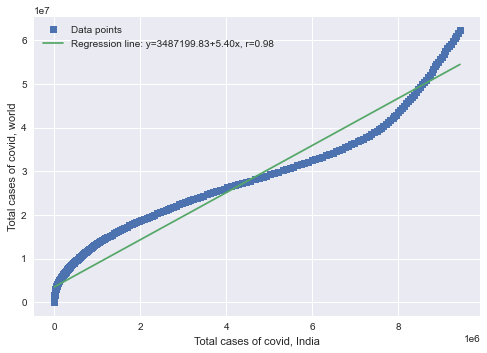

Regression line: y=247965.70+8.25x, r=0.97


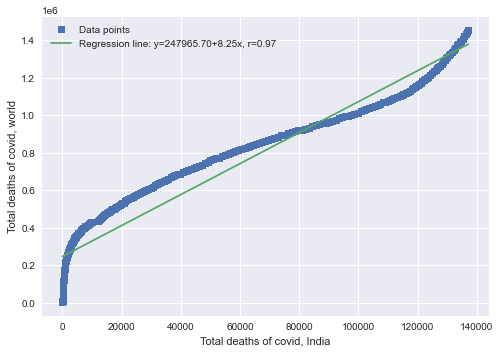

In [38]:
casesInIND = []
casesInWorld = []
for i in range(len(dataCasesIND[1])):
    if dataCasesIND[1][i]!= None and totalCasesInWorldJHU[i]!= None:
        casesInIND.append(dataCasesIND[1][i])
        casesInWorld.append(totalCasesInWorldJHU[i])
deathsInIND = []
deathsInWorld = []
for i in range(len(dataDeathsIND[1])):
    if dataDeathsIND[1][i]!= None and totalDeathsInWorldJHU[i]!= None:
        deathsInIND.append(dataDeathsIND[1][i])
        deathsInWorld.append(totalDeathsInWorldJHU[i])
    
        
        
correlationChecker(casesInIND,casesInWorld,"Total cases of covid, India","Total cases of covid, world")   
correlationChecker(deathsInIND,deathsInWorld,"Total deaths of covid, India","Total deaths of covid, world")    

<p>
For both the plots correlation coefficient is almost same 0.98<br>
which tells us that as cases and deaths in India are increasing simultaneously does cases and deaths in world.But there is some 
difference in the rate<br>
As cases increase by 1 unit in india world cases increase by 5.40 units and as deaths increase by 1 unit in India world deaths 
increase by 8.25<br>
which indiacates that mortality 
</p>



Text(0.5, 1.0, 'Total cases in different countries as of 30th Nov 2020')

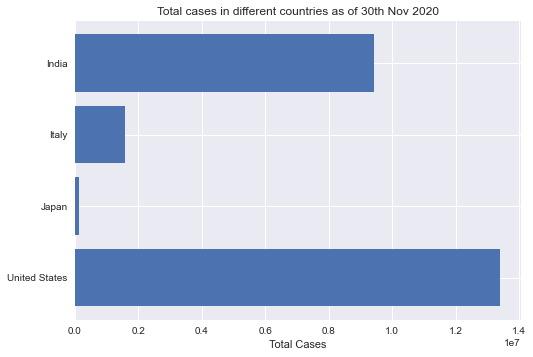

In [39]:
fig, ax = plt.subplots()
y_pos = np.arange(len(df_cases_selected_countries["location"]))
ax.barh(y_pos, df_cases_selected_countries["total_cases"])
ax.set_yticks(y_pos)
ax.set_yticklabels(df_cases_selected_countries["location"])
ax.invert_yaxis()  # labels read top-to-bottom
ax.set_xlabel('Total Cases')
ax.set_title('Total cases in different countries as of 30th Nov 2020')

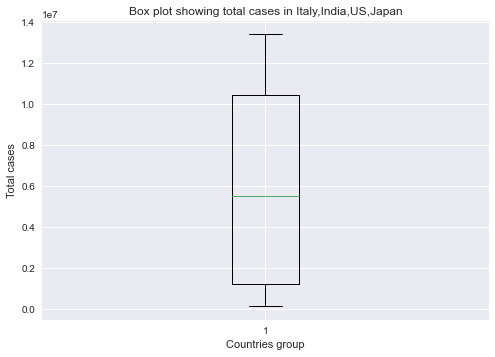

In [40]:
plt.xlabel("Countries group")
plt.ylabel("Total cases")
plt.title("Box plot showing total cases in Italy,India,US,Japan")
plt.boxplot(df_cases_selected_countries["total_cases"])
plt.show()

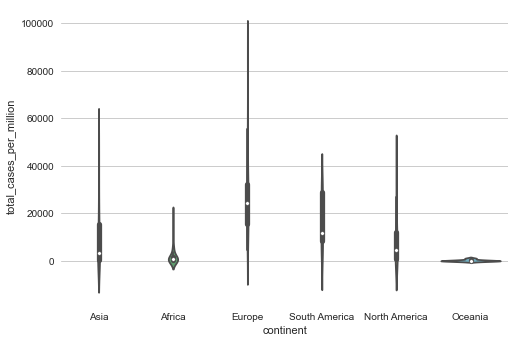

<AxesSubplot:xlabel='continent', ylabel='total_deaths_per_million'>

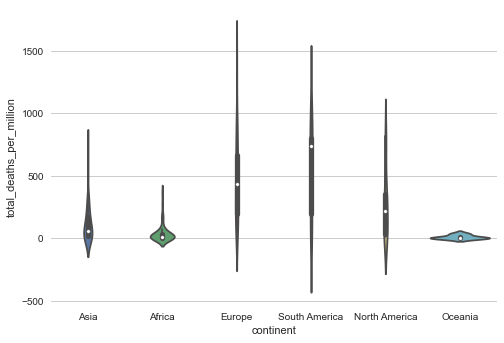

In [41]:
sns.set_style('whitegrid')
sns.violinplot(x='continent', y='total_cases_per_million', data=df_cases_today)
plt.show()
sns.violinplot(x='continent', y='total_deaths_per_million', data=df_cases_today)

<H1> Hypothesis </H1>

<h2> Cases Across Different Countries :</h2>

<h3> Hypothesis 1: Total cases in India is related to that of USA</h3>

H0:
H1:

<h6> Analysing Total cases in India and USA</h6>

We shall fist begin with analysing the cases of COVID that were reported in 2020 in India and USA. For this we have plotted the line graph of new cases per million in both the countries in the same chart. We have used the attribute per million to account for the difference in population between the countries.

In [107]:
df_covid_ind = df_covid_data.loc[df_covid_data['location']=='India'].dropna(subset = ['total_cases'])
df_covid_usa = df_covid_data.loc[df_covid_data['location']=='United States'].dropna(subset = ['total_cases'])


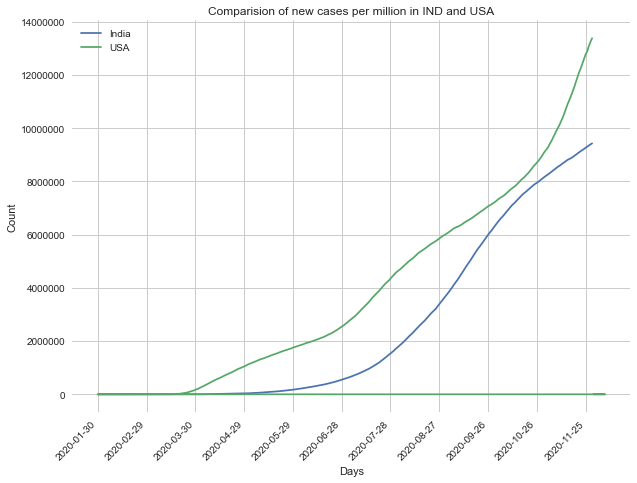

In [120]:
plt.figure(figsize=[10,8])
ax = plt.axes(xlabel="Days",ylabel="Count",title="Comparision of new cases per million in IND and USA")
ax.xaxis.set_major_locator(plt.MaxNLocator(12))
fig = ax.figure
ax.figure.canvas.draw()
ax.yaxis.set_major_formatter('{x:0.0f}')         
fig.autofmt_xdate(rotation=45)
ax.plot(df_covid_ind['date'],df_covid_ind['total_cases'],label="India")
ax.plot(df_covid_usa['date'],df_covid_usa['total_cases'],label="USA")
plt.legend()
plt.show()

<h6>Box Plot </h6>

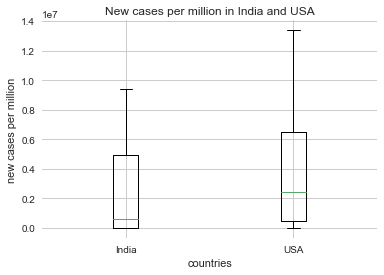

In [122]:
data=[df_covid_ind['total_cases'],df_covid_usa['total_cases']]
plt.boxplot(data,notch=0, sym='+')
plt.xticks([1, 2], ['India', 'USA'])
plt.title("New cases per million in India and USA")
plt.xlabel("countries")
plt.ylabel("new cases per million")
plt.show()

In [128]:
print(pearsonr(df_covid_ind['total_cases'],df_covid_usa['total_cases'][8:]))


(0.9639335741043054, 3.0657370103616465e-176)


The P value of the statistic is found to be very small and equal to $3 x 10^{-176}$. Hence we reject H0.

<B> Conclusion : </B>From the above plots it is clear that total cases in India is strongly correlated to the total cases in USA.

<h3> Hypothesis 2: Total cases and deaths in a country directly depends on the population of the country</h3>

H0: H1:

<h6> Scatter plot of cases, deaths due to COVID along with heat map of population</h6>

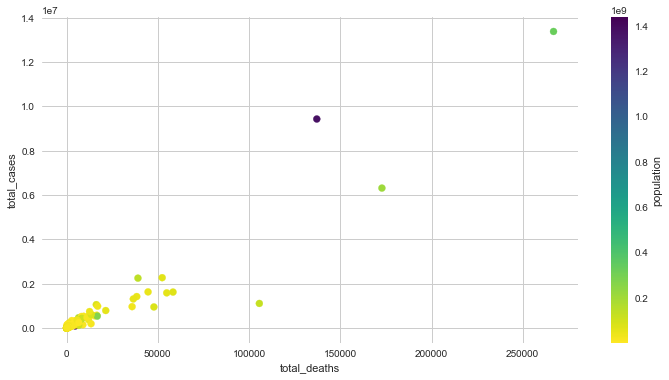

In [46]:
df_cases_today_300 = df_cases_today.loc[df_cases_today['total_cases'] > 0][:-2]
plt.figure(figsize=[12,6])
plt.scatter(data=df_cases_today_300, x='total_deaths', y='total_cases', c='population', cmap='viridis_r' );
plt.colorbar(label='population');
plt.xlabel('total_deaths');
plt.ylabel('total_cases');
axes = plt.gca()

The above scatter plot does support H1, however for a clearer picture, we shall plot the heat map of the correlation matrix of the attributes.

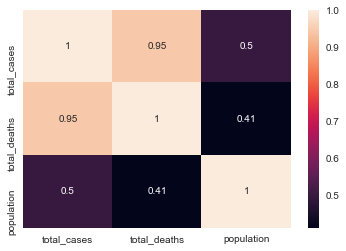

Assoc. - population and total_cases (0.49735615304133607, 2.923728984845876e-12)
Assoc. - population and total_deaths (0.4107516845853533, 1.8064893291618904e-08)


In [126]:
df_cases_today_300 = df_cases_today_300.dropna(subset = ['total_cases','total_deaths','population'])
correlation_mat = df_cases_today_300[['total_cases','total_deaths','population']].corr()
sns.heatmap(correlation_mat, annot = True)
plt.show()
print("Assoc. - population and total_cases",pearsonr(df_cases_today_300['population'],df_cases_today_300['total_cases']))
print("Assoc. - population and total_deaths",pearsonr(df_cases_today_300['population'],df_cases_today_300['total_deaths']))

The positive correlation values do suggest that total cases and deaths reported of COVID in a country do depend on population directly and hence H0 is rejected.

<h2>Effect of Age groups on number of covid cases </h2>

<p>
    In this section we tried to find the relation of the number of cases with the age group.
We have shown this relation through the help of <u>Pie Chart.</u>
A pie chart (or a circle chart) is a circular statistical graphic, which is divided into slices to illustrate numerical proportion. In a pie chart, the arc length of each slice (and consequently its central angle and area), is proportional to the quantity it represents.<br>
In the python code:<br>
i)Through the help of the loop we have appended the age in the array ageGroup[].<br>
ii)Through the help of the loop we have appended the percentage in the array percentage[].<br>
iii)Then we have used the function plt.pie to plot in pie chart using the respective arguments.<br>
</p>
<h3> Hypothesis 1: Proportion of COVID cases in India is directly proportional to age upto 75 years of age</h3>
<P>

H0: Number of cases are same across all age groups in India<br>
H1: There is some difference in number of cases across the age groups <br>
</P>

<h6> Pie chart depicting the proportions of cases in various age groups in India </h6>

([<matplotlib.patches.Wedge at 0x27529bb2940>,
 [Text(1.099864295735893, 0.017278048656840017, 'Less than 14 years'),
  Text(1.0933570509441903, 0.12070774271198717, '15-29 years'),
  Text(0.9397051872092018, 0.5717990566030334, '30-44 years'),
  Text(-0.4652279531565006, 0.9967762796143441, '45-59 years'),
  Text(-0.36610163557183434, -1.0372895412716876, '60-74 years'),
  Text(1.042912059127538, -0.34976340135348516, 'More than 75 years')])

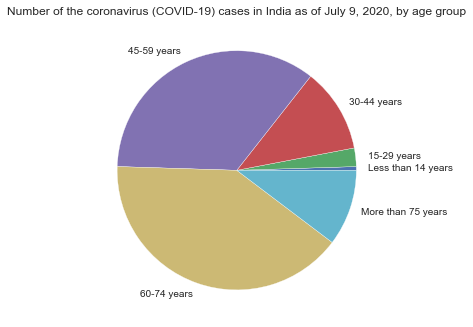

In [48]:
ageGroup = []
percentage = []
colAge = ws_age_data['B']
colPer = ws_age_data['C']
for x in range(5,11):
    ageGroup.append(colAge[x].value)
    percentage.append(colPer[x].value)
plt.title("Number of the coronavirus (COVID-19) cases in India as of July 9, 2020, by age group")
plt.pie(percentage, labels = ageGroup) 

In [135]:
df_age_data_modif = df_age_data.loc[5:10,1:2]
df_age_data_modif['age'] = [5,14,25,40,70,90]
df_age_data_modif['per'] = df_age_data_modif[2]
df_age_data_modif

1     2  age   per
5   Less than 14 years   0.5    5   0.5
6          15-29 years   2.5   14   2.5
7          30-44 years  11.4   25  11.4
8          45-59 years  35.1   40  35.1
9          60-74 years  40.2   70  40.2
10  More than 75 years  10.3   90  10.3

In [132]:
print("Assoc. - age and proportion of cases",pearsonr(df_age_data_modif['age'][:-1],df_age_data_modif['per'][:-1]))

Assoc. - age and proportion of cases (0.9396159643637035, 0.017649963464187568)


<h3>Hypothesis 2: Countries with a higher proportion of population older than 65 years of age, had greater cases and deaths per million</h3>
<p>
    H0:
    H1:
</p>    


In [51]:
ageGroupList = ['total_cases_per_million', 'aged_70_older', 'aged_65_older', 'median_age', 'total_deaths_per_million']

<h6> Proportion of population older than 65 years of age </h6>

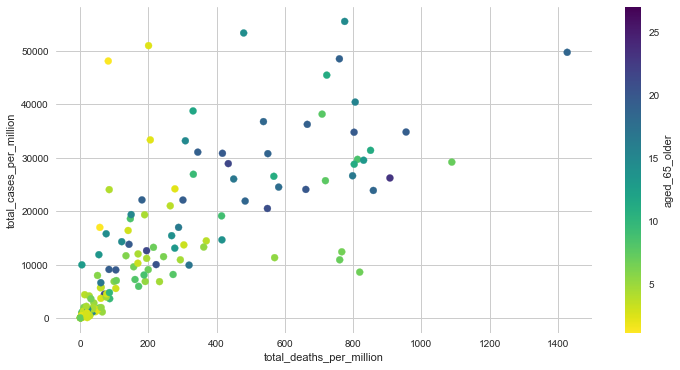

In [143]:
plt.figure(figsize=[12,6])
plt.scatter(data=df_ageGroupData, x='total_deaths_per_million', y='total_cases_per_million', c='aged_65_older', cmap='viridis_r' );
plt.colorbar(label='aged_65_older');
plt.xlabel('total_deaths_per_million');
plt.ylabel('total_cases_per_million');
axes = plt.gca()

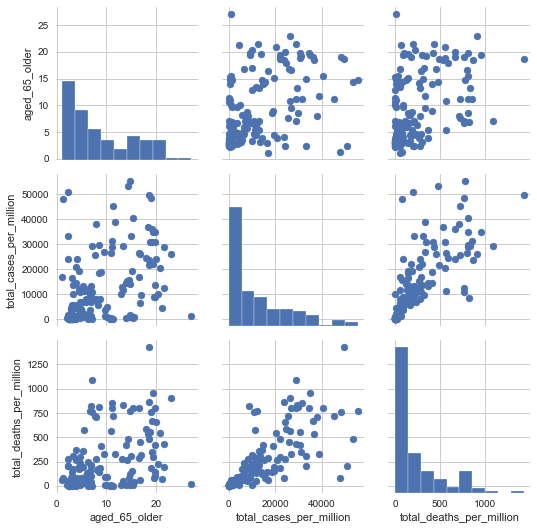

In [141]:
g=sb.PairGrid(data=df_ageGroupData, vars=[ 'aged_65_older','total_cases_per_million','total_deaths_per_million'])
g.map_offdiag(plt.scatter)
g.map_diag(plt.hist);

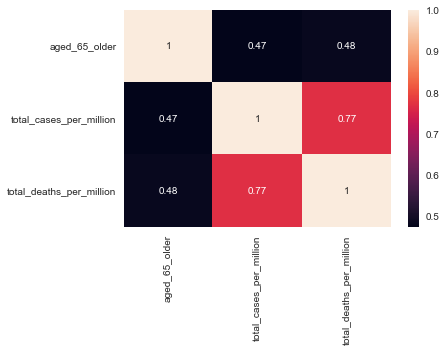

In [140]:
correlation_mat = df_ageGroupData[[ 'aged_65_older','total_cases_per_million','total_deaths_per_million']].corr()
sns.heatmap(correlation_mat, annot = True)

plt.show()

In [139]:
df_ageGroupData = df_ageGroupData.dropna(subset = ['aged_65_older','total_cases_per_million','total_deaths_per_million'])
print("Assoc. - aged_65_older and total_cases_per_million",pearsonr(df_ageGroupData['aged_65_older'],df_ageGroupData['total_cases_per_million']))
print("Assoc. - aged_65_older and total_deaths_per_million",pearsonr(df_ageGroupData['aged_65_older'],df_ageGroupData['total_deaths_per_million']))

Assoc. - aged_65_older and total_cases_per_million (0.4727457357576012, 1.2667519752367446e-10)
Assoc. - aged_65_older and total_deaths_per_million (0.4842577583676207, 3.8358818068327264e-11)


<h3>Hypothesis 3: Countries with a higher proportion of population older than 70 years of age had greater cases and deaths per million</h3>


<h6> Proportion of population older than 70 years of age </h6>


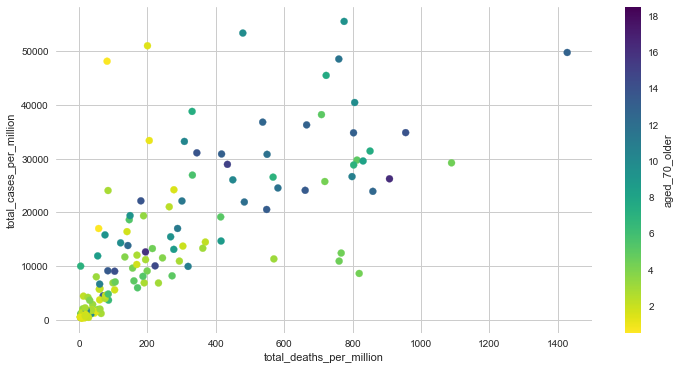

In [144]:
plt.figure(figsize=[12,6])
plt.scatter(data=df_ageGroupData.loc[df_ageGroupData['total_cases_per_million'] > 300], x='total_deaths_per_million', y='total_cases_per_million', c='aged_70_older', cmap='viridis_r' );
plt.colorbar(label='aged_70_older');
plt.xlabel('total_deaths_per_million');
plt.ylabel('total_cases_per_million');
axes = plt.gca()

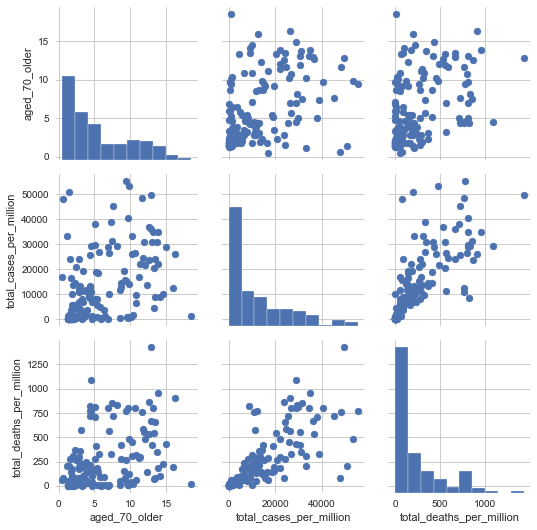

In [145]:
g=sb.PairGrid(data=df_ageGroupData, vars=[ 'aged_70_older','total_cases_per_million','total_deaths_per_million'])
g.map_offdiag(plt.scatter)
g.map_diag(plt.hist);

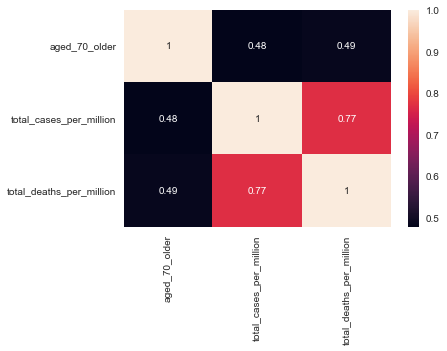

In [146]:
correlation_mat = df_ageGroupData[[ 'aged_70_older','total_cases_per_million','total_deaths_per_million']].corr()
sns.heatmap(correlation_mat, annot = True)
plt.show()

In [147]:
df_ageGroupData = df_ageGroupData.dropna(subset = ['aged_70_older','total_cases_per_million','total_deaths_per_million'])
print("Assoc. - aged_70_older and total_cases_per_million",pearsonr(df_ageGroupData['aged_70_older'],df_ageGroupData['total_cases_per_million']))
print("Assoc. - aged_70_older and total_deaths_per_million",pearsonr(df_ageGroupData['aged_70_older'],df_ageGroupData['total_deaths_per_million']))

Assoc. - aged_70_older and total_cases_per_million (0.4757728436054714, 9.292433091550181e-11)
Assoc. - aged_70_older and total_deaths_per_million (0.485546173743143, 3.3464817568300115e-11)


<h3>Hypothesis 4: Countries with a higher higher median age had greater cases and deaths per million</h3>


<h6> Median age </h6>


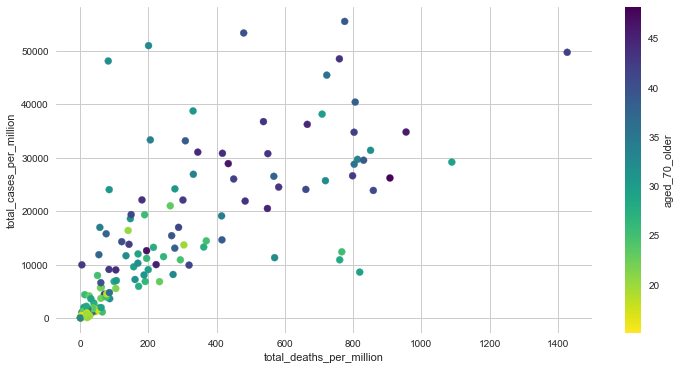

In [58]:
plt.figure(figsize=[12,6])
plt.scatter(data=df_ageGroupData, x='total_deaths_per_million', y='total_cases_per_million', c='median_age', cmap='viridis_r' );
plt.colorbar(label='aged_70_older');
plt.xlabel('total_deaths_per_million');
plt.ylabel('total_cases_per_million');
axes = plt.gca()

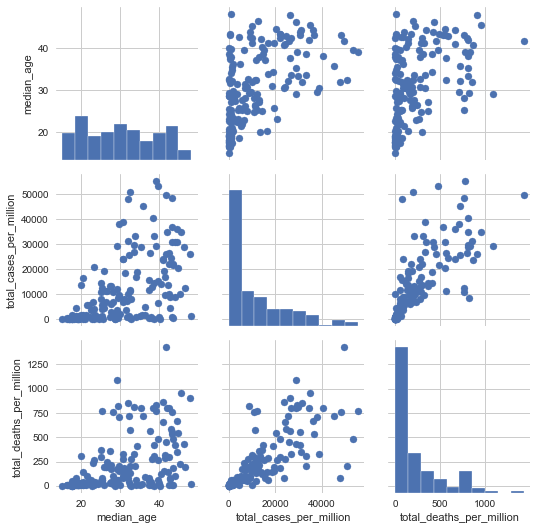

In [59]:
g=sb.PairGrid(data=df_ageGroupData, vars=[ 'median_age','total_cases_per_million','total_deaths_per_million'])
g.map_offdiag(plt.scatter)
g.map_diag(plt.hist);

Next we have made the correlation matrix for the factors mentioned above.
In this matrix if the values are above 0 then they are directly proportional.
And if the values are less than 0 then they are inversely proportional.
In the matrix we can see that all the diagonal elements are having value 1 as they are relation to each other only
If the value is equal to 0 then it indicates that there is no relation between the two elements being compared.


Correlation matrix as a heat map of the above plots

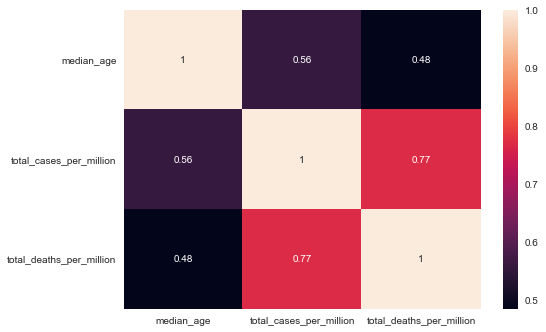

In [60]:
correlation_mat = df_ageGroupData[[ 'median_age','total_cases_per_million','total_deaths_per_million']].corr()
sns.heatmap(correlation_mat, annot = True)
plt.show()

In [156]:
df_ageGroupData = df_ageGroupData.dropna(subset = ['median_age','total_cases_per_million','total_deaths_per_million'])
print("Assoc. - median_age and total_cases_per_million",pearsonr(df_ageGroupData['median_age'],df_ageGroupData['total_cases_per_million']))
print("Assoc. - median_age and total_deaths_per_million",pearsonr(df_ageGroupData['median_age'],df_ageGroupData['total_deaths_per_million']))

Assoc. - median_age and total_cases_per_million (0.5545722142180631, 9.037026555671896e-15)
Assoc. - median_age and total_deaths_per_million (0.4848613094684803, 3.5985545595939865e-11)


As we hypothesized, a strong positive correlation exists in between the amount of fatal cases per population and median_age, aged_65_older, aged_70_older. There is a positive correlation for each of the age related statistics to the amount of deaths per population.


<h2> Effect of altitude upon the fatalities of Covid across several countries </h2>

<h3>Hypothesis 1: Countries with a higher altitude had greater cases per million</h3>

<P>
Hypothesis test:<br>
H0: Cases are independent of altitude of the place<br/>
H1: There is some effect of altitude on cases at that place<br/>
<p>

In [168]:
countries = ['India',
             'Mexico',
             'Nepal',
             'United Kingdom',
             'United States']

In [169]:
df_altitude_modif_countries = df_altitude_modif.T
df_altitude_modif_countries = df_altitude_modif_countries[countries]
df_altitude_modif_countries = df_altitude_modif_countries.T
df_altitude_modif_countries['Country'] = countries

Text(0.5, 1.0, 'Altitude in different countries')

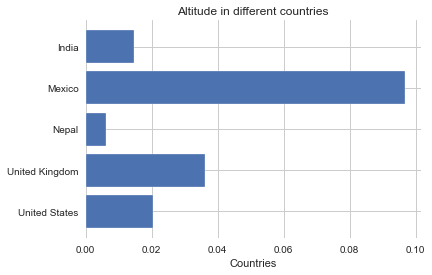

In [170]:
fig, ax = plt.subplots()
y_pos = np.arange(len(df_altitude_modif_countries["Country"]))
ax.barh(y_pos, df_altitude_modif_countries["Fatality ratio"])
ax.set_yticks(y_pos)
ax.set_yticklabels(df_altitude_modif_countries["Country"])
ax.invert_yaxis()  # labels read top-to-bottom
ax.set_xlabel('Countries')
ax.set_title('Altitude in different countries')

Text(0.5, 1.0, 'No. of cases in different countries')

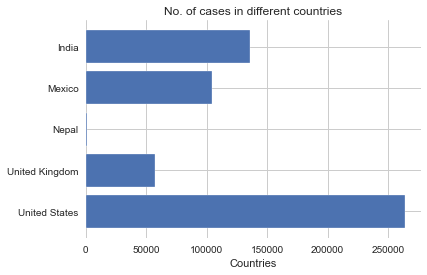

In [171]:
fig, ax = plt.subplots()
y_pos = np.arange(len(df_altitude_modif_countries["Country"]))
ax.barh(y_pos, df_altitude_modif_countries["No of cases"])
ax.set_yticks(y_pos)
ax.set_yticklabels(df_altitude_modif_countries["Country"])
ax.invert_yaxis()  # labels read top-to-bottom
ax.set_xlabel('Countries')
ax.set_title('No. of cases in different countries')

Next we have made the correlation matrix for the factors mentioned above.
In this matrix if the values are above 0 then they are directly proportional.
And if the values are less than 0 then they are inversely proportional.
In the matrix we can see that all the diagonal elements are having value 1 as they are relation to each other only
If the value is equal to 0 then it indicates that there is no relation between the two elements being compared.


             No of cases  Altitude
No of cases     1.000000 -0.525455
Altitude       -0.525455  1.000000


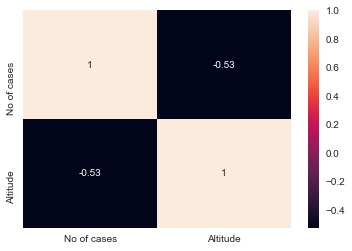

In [174]:
df_altitude_modif_countries['Altitude'] = df_altitude_modif_countries['Altitude'].map(lambda name : float(name))
df_altitude_modif_countries['No of cases'] = df_altitude_modif_countries['No of cases'].map(lambda name : float(name))

correlation_mat = df_altitude_modif_countries[['No of cases','Altitude']].corr()
print(correlation_mat)
sns.heatmap(correlation_mat, annot = True)
plt.show()

<p>From the above we have that correlation between Altitude and number of cases is negative -0.53. The negative correlation depicts inverse relationship between the two factors. Let us take two countries India and Nepal. The altitude of nepal is higher compared to India which indicates number of cases is more in India than Nepal.</p>

<h2> Effect of a country's economy upon the cases and fatalities due to covid </h2>

<h3> Hypothesis 1: Countries with higher GDP per capita reported more number of cases of COVID</h3>

In [66]:
economy_list

['gdp_per_capita',
 'human_development_index',
 'extreme_poverty',
 'total_deaths_per_million',
 'total_cases_per_million']

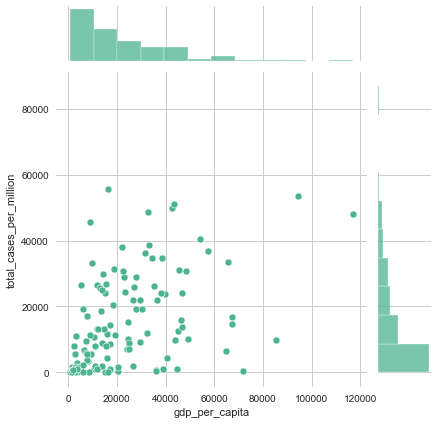

In [67]:
sns.jointplot(x=df_economy['gdp_per_capita'], y=df_economy['total_cases_per_million'],  color="#4CB391")

In [181]:
df3 = df_economy.copy()
# This creates new columns filled with the binned column data
bin(df3, economy_list)

In [182]:
anova_df = df3[['gdp_per_capita_bins','total_cases_per_million']].dropna()
anova = smf.ols(formula='total_cases_per_million ~ C(gdp_per_capita_bins)', data=anova_df).fit()
print(anova.summary())

                               OLS Regression Results                              
Dep. Variable:     total_cases_per_million   R-squared:                       0.324
Model:                                 OLS   Adj. R-squared:                  0.274
Method:                      Least Squares   F-statistic:                     6.458
Date:                     Wed, 09 Dec 2020   Prob (F-statistic):           1.82e-07
Time:                             18:52:13   Log-Likelihood:                -1413.9
No. Observations:                      131   AIC:                             2848.
Df Residuals:                          121   BIC:                             2877.
Df Model:                                9                                         
Covariance Type:                 nonrobust                                         
                                        coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------

In [70]:
multi_comparison = multi.MultiComparison(anova_df["total_cases_per_million"], anova_df["gdp_per_capita_bins"])
results = multi_comparison.tukeyhsd()
print(results)

      Multiple Comparison of Means - Tukey HSD, FWER=0.05      
 group1 group2   meandiff  p-adj     lower      upper    reject
---------------------------------------------------------------
10=100%  1=10%  -24552.408  0.001  -39772.688 -9332.1279   True
10=100%  2=20% -22485.4956  0.001 -37985.0702 -6985.9211   True
10=100%  3=30%  -18835.652 0.0056 -34335.2265 -3336.0775   True
10=100%  4=40% -13884.6703  0.121 -29384.2448  1614.9042  False
10=100%  5=50%  -9036.4704 0.6594 -24536.0449  6463.1042  False
10=100%  6=60%  -10620.431 0.4594 -26120.0055  4879.1435  False
10=100%  7=70%  -6589.7958    0.9 -22089.3704  8909.7787  False
10=100%   8=80   -2041.744    0.9 -17541.3185 13457.8305  False
10=100%  9=90%  -4017.7771    0.9 -19517.3516 11481.7975  False
  1=10%  2=20%   2066.9124    0.9 -13153.3677 17287.1924  False
  1=10%  3=30%    5716.756    0.9  -9503.5241  20937.036  False
  1=10%  4=40%  10667.7377 0.4263  -4552.5424 25888.0177  False
  1=10%  5=50%  15515.9376 0.0419    295

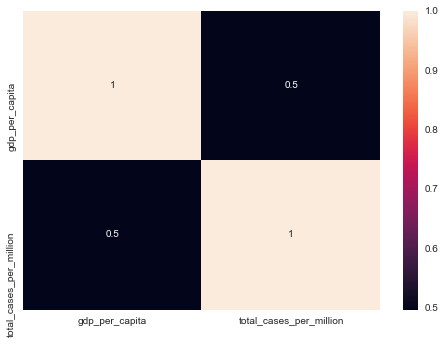

In [71]:
correlation_mat = df_economy[['gdp_per_capita','total_cases_per_million']].corr()
sns.heatmap(correlation_mat, annot = True)
plt.show()

<h3> Hypothesis 2: Countries with higher human_development_index reported more number of cases of COVID</h3>

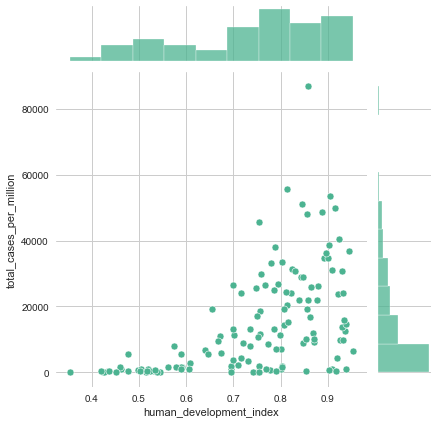

In [72]:
sns.jointplot(x=df_economy['human_development_index'], y=df_economy['total_cases_per_million'],  color="#4CB391")

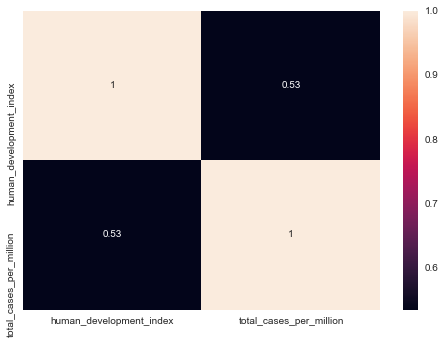

In [73]:
correlation_mat = df_economy[['human_development_index','total_cases_per_million']].corr()
sns.heatmap(correlation_mat, annot = True)
plt.show()

In [186]:
economy_list

['gdp_per_capita',
 'human_development_index',
 'extreme_poverty',
 'total_deaths_per_million',
 'total_cases_per_million']

In [185]:
anova_df = df3[['human_development_index_bins','total_cases_per_million']].dropna()
anova = smf.ols(formula='total_cases_per_million ~ C(human_development_index_bins)', data=anova_df).fit()
print(anova.summary())

                               OLS Regression Results                              
Dep. Variable:     total_cases_per_million   R-squared:                       0.365
Model:                                 OLS   Adj. R-squared:                  0.318
Method:                      Least Squares   F-statistic:                     7.788
Date:                     Wed, 09 Dec 2020   Prob (F-statistic):           5.28e-09
Time:                             18:55:24   Log-Likelihood:                -1432.3
No. Observations:                      132   AIC:                             2885.
Df Residuals:                          122   BIC:                             2913.
Df Model:                                9                                         
Covariance Type:                 nonrobust                                         
                                                 coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------

In [187]:
multi_comparison = multi.MultiComparison(anova_df["total_cases_per_million"], anova_df["human_development_index_bins"])
results = multi_comparison.tukeyhsd()
print(results)

      Multiple Comparison of Means - Tukey HSD, FWER=0.05      
 group1 group2   meandiff  p-adj     lower      upper    reject
---------------------------------------------------------------
10=100%  1=10% -16619.7093 0.0311 -32433.2916   -806.127   True
10=100%  2=20% -15905.8792 0.0474 -31719.4615   -92.2969   True
10=100%  3=30% -11855.1575 0.3853 -28314.4558  4604.1408  False
10=100%  4=40%  -8172.3722 0.8065 -24287.1926  7942.4483  False
10=100%  5=50%  -2301.6501    0.9 -18416.4706 13813.1704  False
10=100%  6=60%  -2161.7008    0.9 -18276.5212 13953.1197  False
10=100%  7=70%   8606.1984 0.7544   -7508.622 24721.0189  False
10=100%   8=80   5512.5358    0.9 -10602.2847 21627.3562  False
10=100%  9=90%  11589.8495 0.3875  -4524.9709   27704.67  False
  1=10%  2=20%    713.8301    0.9 -15099.7522 16527.4124  False
  1=10%  3=30%   4764.5518    0.9 -11694.7466 21223.8501  False
  1=10%  4=40%   8447.3371 0.7735  -7667.4833 24562.1576  False
  1=10%  5=50%  14318.0592 0.1271  -1796

<h2> Effect of Hospital facilities upon the cases observed in covid </h2>

<h3> Hypothesis 1:  hospital_beds_per_thousand in a countries with more than 1000 cases is directly proportionate to number of cases </h3>

In [74]:
df_temp = df_medical.loc[df_medical['total_cases_per_million']>1000]

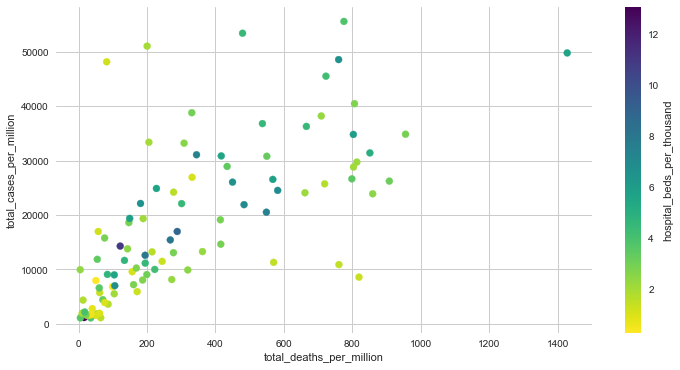

In [75]:
plt.figure(figsize=[12,6])
plt.scatter(data=df_temp, x='total_deaths_per_million', y='total_cases_per_million', c='hospital_beds_per_thousand', cmap='viridis_r' );
plt.colorbar(label='hospital_beds_per_thousand');
plt.xlabel('total_deaths_per_million');
plt.ylabel('total_cases_per_million');
axes = plt.gca()

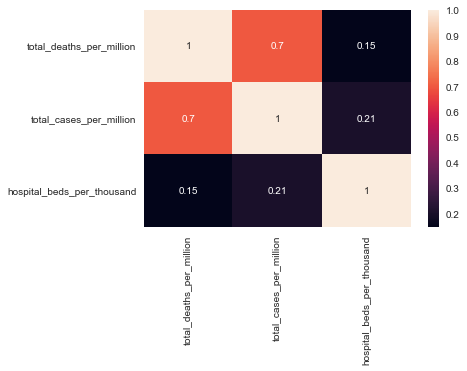

In [188]:
correlation_mat = df_temp[['total_deaths_per_million','total_cases_per_million','hospital_beds_per_thousand']].corr()
sns.heatmap(correlation_mat, annot = True)
plt.show()

In [195]:
df_temp = df_temp.dropna(subset=['total_deaths_per_million','total_cases_per_million','hospital_beds_per_thousand'])
print("Assoc. - total_deaths_per_million and hospital_beds_per_thousand",pearsonr(df_temp['total_deaths_per_million'],df_temp['hospital_beds_per_thousand']))
print("Assoc. - total_cases_per_million and hospital_beds_per_thousand",pearsonr(df_temp['total_cases_per_million'],df_temp['hospital_beds_per_thousand']))

Assoc. - total_deaths_per_million and hospital_beds_per_thousand (0.14561547329408395, 0.15469208086346792)
Assoc. - total_cases_per_million and hospital_beds_per_thousand (0.20537675033470681, 0.043583827436443234)


<h3> Hypothesis 2: Countries with higher cases per million had higher life_expentancy </h3>

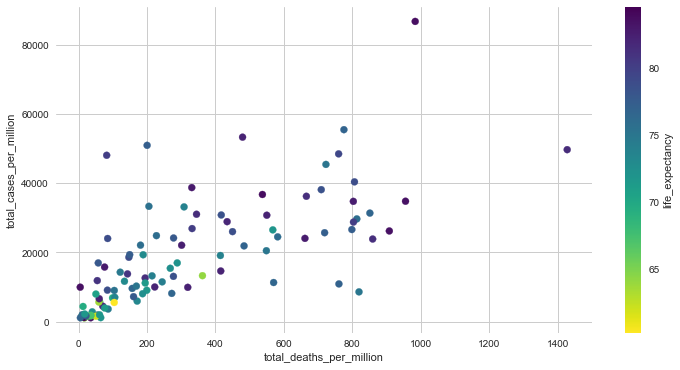

In [76]:
plt.figure(figsize=[12,6])
plt.scatter(data=df_temp, x='total_deaths_per_million', y='total_cases_per_million', c='life_expectancy', cmap='viridis_r' );
plt.colorbar(label='life_expectancy');
plt.xlabel('total_deaths_per_million');
plt.ylabel('total_cases_per_million');
axes = plt.gca()

In [196]:
df_temp = df_temp.dropna(subset=['total_deaths_per_million','total_cases_per_million','life_expectancy'])
print("Assoc. - total_deaths_per_million and life_expectancy",pearsonr(df_temp['total_deaths_per_million'],df_temp['life_expectancy']))
print("Assoc. - total_cases_per_million and life_expectancy",pearsonr(df_temp['total_cases_per_million'],df_temp['life_expectancy']))

Assoc. - total_deaths_per_million and life_expectancy (0.35857265583960357, 0.0003104102691965809)
Assoc. - total_cases_per_million and life_expectancy (0.4328552375764031, 9.506379634123818e-06)


<h2> Indian Economy </h2>

<p>In this section we have found the relation between the number of cases in India verses the other factors related to economy.
Those factors include:<ul>
<li>Inflation rate</li>
<li>India infrastructure output</li>
<li>Repo rates</li>
<li>Consumer Spending</li>
 </ul>   
For this we have made a python code which works as follows:<ul>
<li>df_covid_monthly contains the information about India as we set the location to India.</li>
<li>Next we create a list named data which contains other list such as total cases, inflation, infrastructure, repo rates, and consumer spending.</li>
<li>Next we create a list for the months.</li>
<li>After all the data we plot the histogram and scatter plot using the function plt.scatter and plt.hist. </li>
    </ul>
</p>

<h3> Hypothesis 1: Inflation rate in India and world rose in 2019 and 2020 due to COVID </h3>

In [77]:
df_IND_inf_modif = df_IND_inf.loc[:'World','2015':'2022']
df_IND_inf_modif = df_IND_inf_modif.T
df_IND_inf_modif = df_IND_inf_modif.drop(['Venezuela'], axis=1)
df_IND_inf_modif

Australia  Canada  China, People's Republic of  Ethiopia  France  \
2015        1.5     1.1                          1.4       9.6     0.1   
2016        1.3     1.4                          2.0       6.6     0.3   
2017        2.0     1.6                          1.6      10.7     1.2   
2018        1.9     2.3                          2.1      13.8     2.1   
2019        1.6     1.9                          2.9      15.8     1.3   
2020        0.7     0.6                          2.9      20.2     0.5   
2021        1.3     1.3                          2.7      11.5     0.6   
2022        1.5     1.6                          2.6       8.0     1.0   

      Germany  India  Iraq  Japan  Kenya  United States  World  
2015      0.7    4.9   1.4    0.8    6.6            0.1    2.7  
2016      0.4    4.5   0.5   -0.1    6.3            1.3    2.7  
2017      1.7    3.6   0.1    0.5    8.0            2.1    3.2  
2018      2.0    3.4   0.4    1.0    4.7            2.4    3.6  
2019      1.3    4.8  -0.2    0.5    5.2            1.8    3.5  
2020      0.5    4.9   0.8   -0.1    5.3            1.5    3.2  
2021      1.1    3.7   1.0    0.3    5.0            2.8    3.4  
2022      1.3    3.8   1.5    0.7    5.0            2.1    3.2

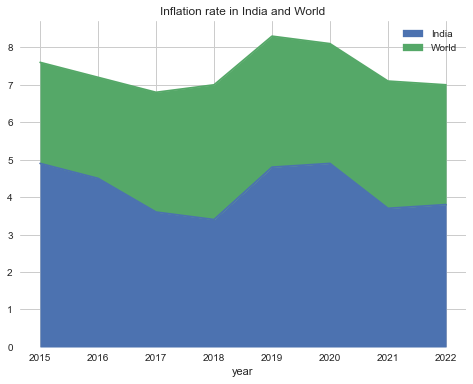

In [204]:
lines = df_IND_inf_modif[['India', 'World']].plot(kind='area',title="Inflation rate in India and World",figsize = [8,6])
df_IND_inf_modif.index.name = 'year'

<h3> Hypothesis 2: GDP in India and USA fell in 2019-20 during the pandemic </h3>

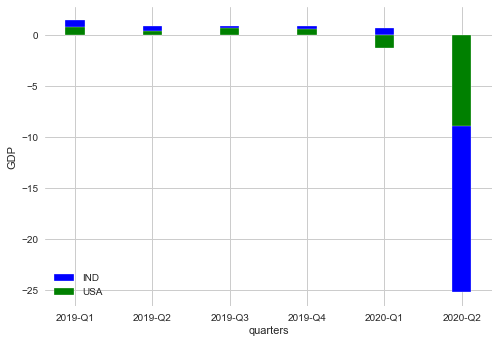

In [79]:
column = ws_economy['A']
countries=['USA','IND']
time=['2019-Q1','2019-Q2','2019-Q3','2019-Q4','2020-Q1','2020-Q2']
values=ws_economy['G']

gdpind=[]
gdpusa=[]
for j in range(1,len(column)):
    if column[j].value=='USA':
        gdpusa.append(values[j].value)
    if column[j].value=='IND':
        gdpind.append(values[j].value)


gdpusa.pop()
data=[gdpind,gdpusa]
fig, ax = plt.subplots() 
ax.bar(time, data[0], color = 'b', width = 0.25)
ax.bar(time, data[1], color = 'g', width = 0.25)
ax.legend(['IND','USA'],loc="lower left")
plt.xlabel('quarters')
plt.ylabel('GDP')
plt.show()


<h3> Hypothesis 3: India's INFRASTRUCTURE OUTPUT is correlated with the pandemic </h3>


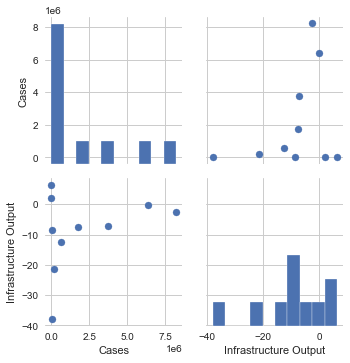

In [217]:
df_covid_monthly = df_covid_data[df_covid_data["date"].str.endswith("01", na=False)]
df_covid_monthly = df_covid_monthly[df_covid_monthly["location"]=="India"]
data = [df_covid_monthly["total_cases"].values.tolist(),
        economyGetter("INDIA INFRASTRUCTURE OUTPUT"),
       ]
months = ["Jan","Feb","Mar","Apr","May","Jun","Jul","Aug","Sep","Oct"]
cols = ["Cases","Infrastructure Output"]
df_econInd_modif = pd.DataFrame(data, index = cols, columns = months)
df_econInd_modif = df_econInd_modif.T
g=sb.PairGrid(data=df_econInd_modif)
g.map_offdiag(plt.scatter)
g.map_diag(plt.hist);


Next we have made the correlation matrix for the factors mentioned above.
In this matrix if the values are above 0 then they are directly proportional.
And if the values are less than 0 then they are inversely proportional.
In the matrix we can see that all the diagonal elements are having value 1 as they are relation to each other only
If the value is equal to 0 then it indicates that there is no relation between the two elements being compared.


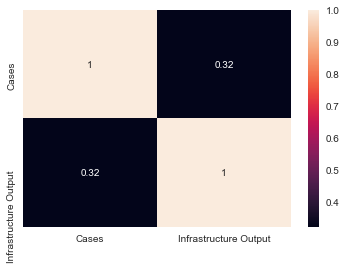

In [218]:
correlation_mat = df_econInd_modif.corr()
sns.heatmap(correlation_mat, annot = True)
plt.show()

In [219]:
df_temp = df_econInd_modif.dropna(subset=cols)
print("Assoc. - Cases and Infrastructure Output",pearsonr(df_temp['Cases'],df_temp['Infrastructure Output']))


Assoc. - Cases and Infrastructure Output (0.3199516817101196, 0.36745979672702955)


<h3> Hypothesis 4: India's REPO RATES is correlated with the pandemic </h3>


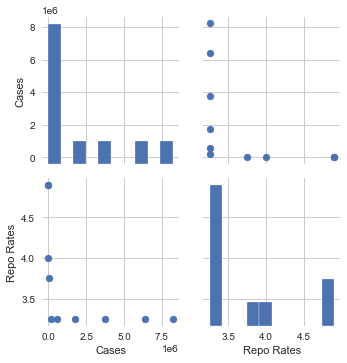

In [211]:
df_covid_monthly = df_covid_data[df_covid_data["date"].str.endswith("01", na=False)]
df_covid_monthly = df_covid_monthly[df_covid_monthly["location"]=="India"]
data = [df_covid_monthly["total_cases"].values.tolist(),
        economyGetter("REPO RATES"),
        ]
months = ["Jan","Feb","Mar","Apr","May","Jun","Jul","Aug","Sep","Oct"]
cols = ["Cases","Repo Rates"]
df_econInd_modif = pd.DataFrame(data, index = cols, columns = months)
df_econInd_modif = df_econInd_modif.T
g=sb.PairGrid(data=df_econInd_modif)
g.map_offdiag(plt.scatter)
g.map_diag(plt.hist);


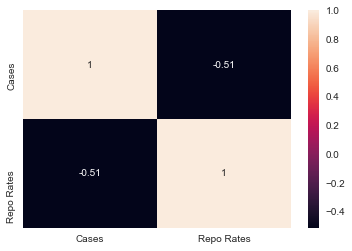

In [212]:
correlation_mat = df_econInd_modif.corr()
sns.heatmap(correlation_mat, annot = True)
plt.show()

In [213]:
print("Assoc. - Cases and Repo Rates",pearsonr(df_temp['Cases'],df_temp['Repo Rates']))


Assoc. - Cases and Repo Rates (-0.5134539647138775, 0.12903029666468196)


<h3> Hypothesis 5: India's CONSUMER SPENDING is correlated with the pandemic </h3>


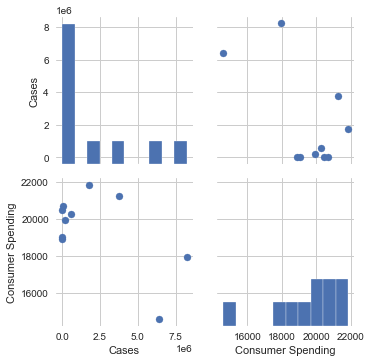

In [214]:
df_covid_monthly = df_covid_data[df_covid_data["date"].str.endswith("01", na=False)]
df_covid_monthly = df_covid_monthly[df_covid_monthly["location"]=="India"]
data = [df_covid_monthly["total_cases"].values.tolist(),
        economyGetter("CONSUMER SPENDING"),
       ]
months = ["Jan","Feb","Mar","Apr","May","Jun","Jul","Aug","Sep","Oct"]
cols = ["Cases","Consumer Spending"]
df_econInd_modif = pd.DataFrame(data, index = cols, columns = months)
df_econInd_modif = df_econInd_modif.T
g=sb.PairGrid(data=df_econInd_modif)
g.map_offdiag(plt.scatter)
g.map_diag(plt.hist);


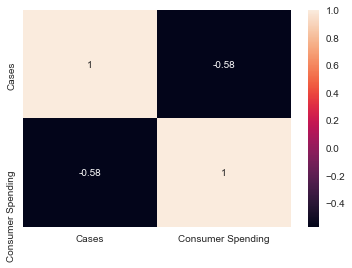

In [215]:
correlation_mat = df_econInd_modif.corr()
sns.heatmap(correlation_mat, annot = True)
plt.show()

In [216]:
print("Assoc. - Cases and Consumer Spending",pearsonr(df_temp['Cases'],df_temp['Consumer Spending']))


Assoc. - Cases and Consumer Spending (-0.577750290560148, 0.08025723424337937)



<p><h6>Some important outcomes which we can look into by observing the correlation matrix:</h6><br>
i) We can see that the number of cases is directly proportional to inflation which means that if the number of cases rises then the price of the good increases.<br>
ii) We also see that as the number of cases increases the infrastructural output increases.<br>
iii) We observe that as the number of cases increases the repo rate or the rate at which commercial banks borrow money by selling their securities to the Central bank of our country decreases i.e. they are inversely proportional to each other.<br>
iv) Lastly we observe that as the number of cases increases the consumer spending decreases as they are inversely proportional to each other.<br>
</p><p>
    <h6>
From the observation we can take out the inference that: </h6><br>
i) As the cases increased people stopped coming out of their houses and because of this the consumption of goods decreased which led sellers to increase the price of the goods. <br>
This was done by the sellers because the number of goods getting sold were very less and thus they wanted atleast they should make ample amout of money to survive hence increasing the price of the good and contributing to inflation.<br>
ii) If we observe this output carefully month by month we observe that, for the months January, February and March the production was high as near to normal and the same goes for the months May and after May.<br>
The main effect of the covid was observed in the month of April when there was complete shut down and no output was produced by any industries.<br>
Thus the output is directly proportional because if we consider for the overall year the industrial output did not decreased.<br>
iii) The reason for the decrease in the repo rates is hidden in the meaning of the repo rate.<br>
The decrease in repo rates is to aim at bringing in growth and improving economic development in the country.<br> 
Consumers will borrow more from banks thus stabilizing the inflation. <br>
A decline in the repo rate can lead to the banks bringing down their lending rate.<br>
And as the bank bring down their lending rate people can borrow money from the banks at affordable rate of interest.
Thus because of this the repo rates have decreased as the number of cases increased.<br>
iv) This is quite obvious that the consumer spending will decrease as the cases rises because less people will be going out of their houses when cases rises thus they will spend less in the market.<br>
Another reason is that because of this situation many have lost their jobs and thus to survive in this situation people have dropped their standard of living and are spending less in the market thus decreasing the consumer spending.<br>
</p><p>
    
<h6>So in conclusion we can say that Economy is drastically affected by rise in the cases of Covid.
Hypothesis is correct.</h6>
</p>

<h2>Effect of other diseases upon the cases and fatalities of Covid across several countries </h2>

<p>To find the relation between the factors that constitute diseases such as cardiovascular_deathrate, female_smokers, male_smokers and diabetes_prevalence. For this we have taken 5 constituents on Y-axis and the same on the X-axis.
These are:<br>
i) cardiovascular_deathrate<br>
ii) female_smokers<br>
iii) male_smokers<br>
iv) total_deaths_per_million<br>
v) diabetes_prevalence<br>
There are 25 plots out of which five are histograms and twenty are scatter plot.
These plots are taken for 100 countries and average of all are considered.
</p>

<h3> Hypothesis 1: cardiovascular_death_rate is correlated with the pandemic fatalities</h3>


In [223]:
disease_list

['cardiovasc_death_rate',
 'female_smokers',
 'male_smokers',
 'diabetes_prevalence',
 'total_deaths_per_million']

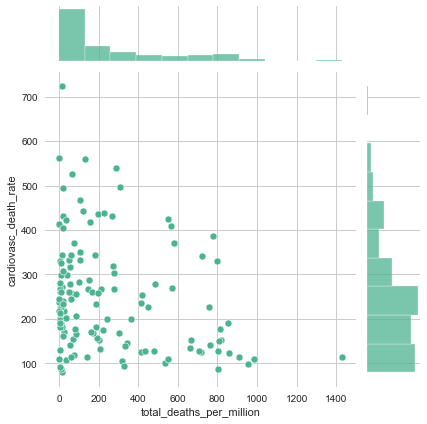

In [225]:
sns.jointplot(x=df_disease['total_deaths_per_million'], y=df_disease['cardiovasc_death_rate'],  color="#4CB391") 
disease_list = ['total_deaths_per_million','cardiovasc_death_rate']

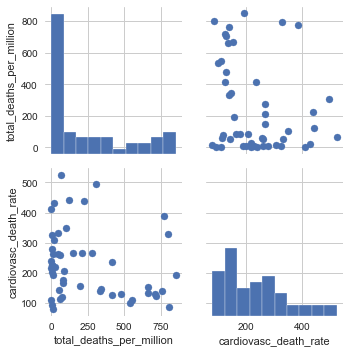

In [226]:
g=sb.PairGrid(data=df_disease.sample(n=50), vars=disease_list)
g.map_offdiag(plt.scatter)
g.map_diag(plt.hist);


Next we have made the correlation matrix for the factors mentioned above.
In this matrix if the values are above 0 then they are directly proportional.
And if the values are less than 0 then they are inversely proportional.
In the matrix we can see that all the diagonal elements are having value 1 as they are relation to each other only
If the value is equal to 0 then it indicates that there is no relation between the two elements being compared.


<p> Correlation Matrix as a Heat map of the above plot </p>

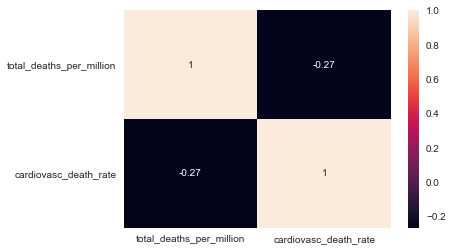

In [227]:
correlation_mat = df_disease[disease_list].corr()
sns.heatmap(correlation_mat, annot = True)
plt.show()

In [241]:
print("Assoc. - total_deaths_per_million and cardiovasc_death_rate",pearsonr(df_disease['total_deaths_per_million'],df_disease['cardiovasc_death_rate']))

Assoc. - total_deaths_per_million and cardiovasc_death_rate (-0.26659252957931284, 0.0019234133327449881)


<h3> Hypothesis 2: female_smokers proportion in a country is correlated with the pandemic fatalities</h3>


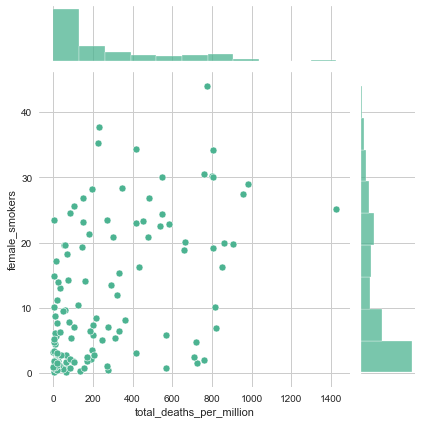

In [228]:
sns.jointplot(x=df_disease['total_deaths_per_million'], y=df_disease['female_smokers'],  color="#4CB391") 
disease_list = ['total_deaths_per_million','female_smokers']

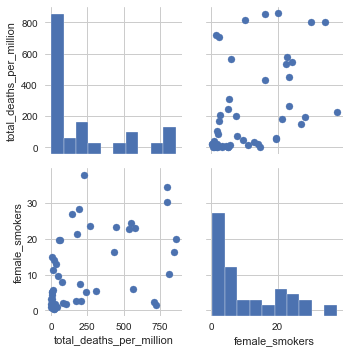

In [229]:
g=sb.PairGrid(data=df_disease.sample(n=50), vars=disease_list)
g.map_offdiag(plt.scatter)
g.map_diag(plt.hist);


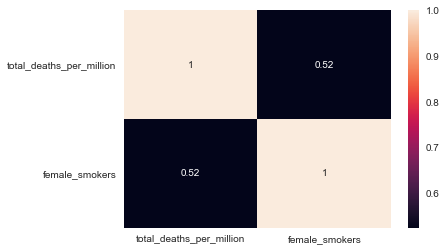

In [230]:
correlation_mat = df_disease[disease_list].corr()
sns.heatmap(correlation_mat, annot = True)
plt.show()

In [242]:
print("Assoc. - total_deaths_per_million and female_smokers",pearsonr(df_disease['total_deaths_per_million'],df_disease['female_smokers']))

Assoc. - total_deaths_per_million and female_smokers (0.5239179743698653, 9.707526273421715e-11)


<h3> Hypothesis 3: male_smokers proportion in a country is correlated with the pandemic fatalities</h3>


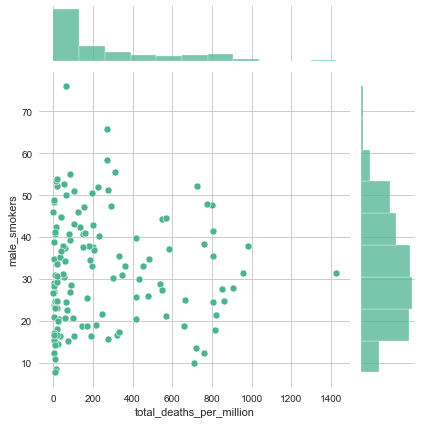

In [231]:
sns.jointplot(x=df_disease['total_deaths_per_million'], y=df_disease['male_smokers'],  color="#4CB391") 
disease_list = ['total_deaths_per_million','male_smokers']

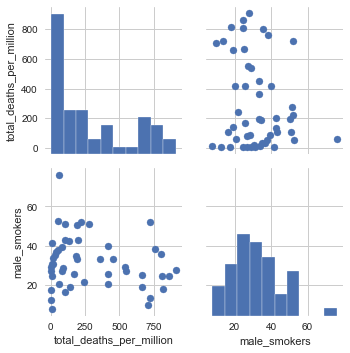

In [232]:
g=sb.PairGrid(data=df_disease.sample(n=50), vars=disease_list)
g.map_offdiag(plt.scatter)
g.map_diag(plt.hist);


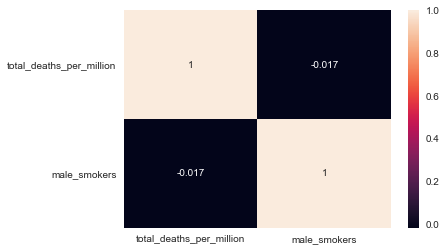

In [233]:
correlation_mat = df_disease[disease_list].corr()
sns.heatmap(correlation_mat, annot = True)
plt.show()

In [243]:
print("Assoc. - total_deaths_per_million and male_smokers",pearsonr(df_disease['total_deaths_per_million'],df_disease['male_smokers']))

Assoc. - total_deaths_per_million and male_smokers (-0.016923705180515742, 0.8466886204386115)


<h3> Hypothesis 4: diabetes_prevalence in a country is correlated with the pandemic fatalities</h3>


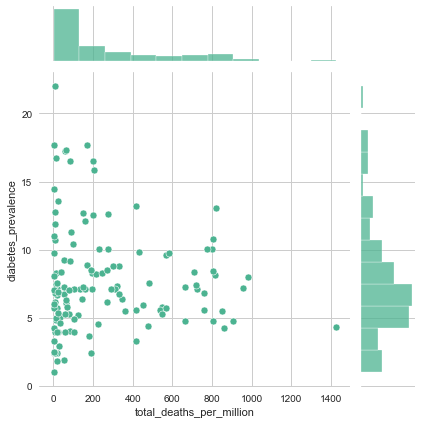

In [237]:
sns.jointplot(x=df_disease['total_deaths_per_million'], y=df_disease['diabetes_prevalence'],  color="#4CB391") 
disease_list = ['total_deaths_per_million','diabetes_prevalence']

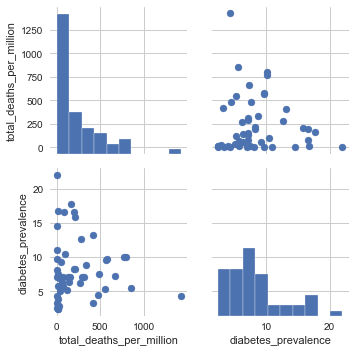

In [238]:
g=sb.PairGrid(data=df_disease.sample(n=50), vars=disease_list)
g.map_offdiag(plt.scatter)
g.map_diag(plt.hist);


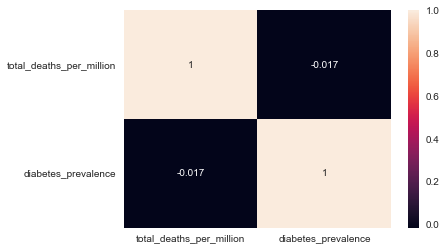

In [239]:
correlation_mat = df_disease[disease_list].corr()
sns.heatmap(correlation_mat, annot = True)
plt.show()

In [244]:
print("Assoc. - total_deaths_per_million and diabetes_prevalence",pearsonr(df_disease['total_deaths_per_million'],df_disease['diabetes_prevalence']))

Assoc. - total_deaths_per_million and diabetes_prevalence (-0.01650073586420611, 0.8504750560492359)


From the grpahs it is not very clear how the diabetes_prevelance,female_smokers,male_smokers are correlated to the mortality rate But we can get the analyse the correlation from the associated correlation matrix.
There is a positive correlation between percentage of female smokers in country and total deaths per million.
Which means the higher the female smokers in a country , more people die of having contracted the virus.
There is a weak negative correlation (-0.017) in the data above between diabetes prevelance and fatal cases per population. The higher the percentage of a countrys population with diabetes, the lower the amount of fatal cases per population. Also there is a week negative correlation between male smokers and fatal cases per population.
The higher the percentage of a countrys population with male smokers, the lower the amount of fatal cases per population.
These three ideas are counterintuitive